# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Watermark" data-toc-modified-id="Watermark-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Watermark</a></div><div class="lev1 toc-item"><a href="#Imports-and-Setups" data-toc-modified-id="Imports-and-Setups-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and Setups</a></div><div class="lev3 toc-item"><a href="#Autoimport-my-code" data-toc-modified-id="Autoimport-my-code-201"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Autoimport my code</a></div><div class="lev3 toc-item"><a href="#Plotting" data-toc-modified-id="Plotting-202"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Plotting</a></div><div class="lev1 toc-item"><a href="#Fig-2-update" data-toc-modified-id="Fig-2-update-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fig 2 update</a></div><div class="lev2 toc-item"><a href="#Extended-data" data-toc-modified-id="Extended-data-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Extended data</a></div><div class="lev1 toc-item"><a href="#Ulitsky's-new-homologs" data-toc-modified-id="Ulitsky's-new-homologs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ulitsky's new homologs</a></div><div class="lev2 toc-item"><a href="#genes-with-orthologs" data-toc-modified-id="genes-with-orthologs-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>genes with orthologs</a></div><div class="lev2 toc-item"><a href="#human-GENCODE-match" data-toc-modified-id="human-GENCODE-match-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>human GENCODE match</a></div><div class="lev2 toc-item"><a href="#Liftover" data-toc-modified-id="Liftover-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Liftover</a></div><div class="lev2 toc-item"><a href="#mouse-GENCODE-match" data-toc-modified-id="mouse-GENCODE-match-44"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>mouse GENCODE match</a></div><div class="lev2 toc-item"><a href="#v22-to-M5-mapping" data-toc-modified-id="v22-to-M5-mapping-45"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>v22 to M5 mapping</a></div><div class="lev1 toc-item"><a href="#Repeat-above..." data-toc-modified-id="Repeat-above...-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Repeat above...</a></div><div class="lev1 toc-item"><a href="#Xist-frags" data-toc-modified-id="Xist-frags-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Xist frags</a></div><div class="lev2 toc-item"><a href="#rel.-luc.-column" data-toc-modified-id="rel.-luc.-column-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>rel. luc. column</a></div><div class="lev1 toc-item"><a href="#Ulitsky's-&quot;correct&quot;-homologs" data-toc-modified-id="Ulitsky's-&quot;correct&quot;-homologs-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ulitsky's "correct" homologs</a></div><div class="lev2 toc-item"><a href="#mouse-genes" data-toc-modified-id="mouse-genes-71"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>mouse genes</a></div><div class="lev2 toc-item"><a href="#comparisons" data-toc-modified-id="comparisons-72"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>comparisons</a></div>

# Watermark

In [1]:
%load_ext watermark
%watermark -a 'Jessime Kirk' -nmv --packages numpy,scipy,pandas,sklearn,matplotlib,seaborn,networkx,notebook,jupyter_contrib_nbextensions

Jessime Kirk Tue Feb 06 2018 

CPython 3.6.3
IPython 6.2.1

numpy 1.13.3
scipy 1.0.0
pandas 0.21.0
sklearn 0.19.1
matplotlib 2.1.0
seaborn 0.8.1
networkx 2.0
notebook 5.4.0
jupyter_contrib_nbextensions 0.2.8

compiler   : GCC 7.2.0
system     : Linux
release    : 4.13.0-26-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# Imports and Setups

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from tqdm import tqdm, trange, tqdm_notebook, tnrange

from scipy.stats import ttest_ind

### Autoimport my code

In [2]:
pwd

'/home/jessime/Code/kmers3/Notebooks'

In [3]:
cd ..

/home/jessime/Code/kmers3


In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

### Plotting

In [6]:
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Fig 2 update

I've got to add any missing lncRNAs from our list to the fig 2 image.

In [33]:
%aimport label_heatmap

In [34]:
v22_repressors = ['BDNF-AS-001',
'CDKN2B-AS1-001',
'KCNQ1OT1-001',
'SCAANT1-001',
'TSIX-001',
'XIST-001',
'UBE3A-ATS',
'MORRBID_MIR4435-2HG',
'NESPAS_unspliced'
]

v22_activators = ['DBET-001',
'HOTAIRM1-001',
'HOTTIP-001',
'LINC00570-001',
'PCAT6-001',
'PVT1-001']

label_dict = {
    'red': v22_repressors,
    'blue': v22_activators
}

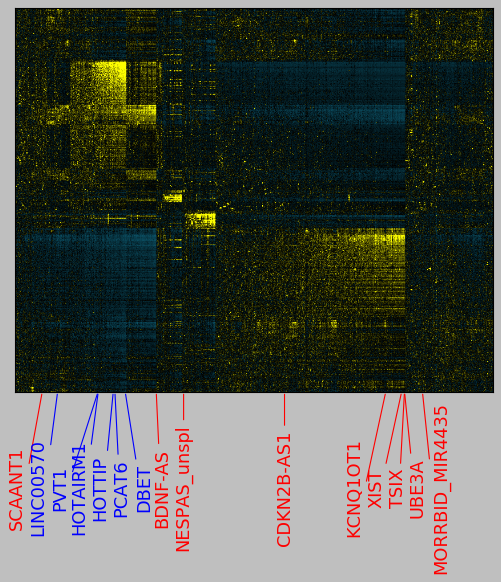

In [10]:
infile = '/home/jessime/Research/treeview/6mers01_v22_std3_list.txt'
image = '/home/jessime/Research/pics/6mers01_v22_std3.png'
outfile = '/home/jessime/Research/pics/6mers01_v22_std3_cis-reg.pdf'
label_heatmap.main(label_dict, infile, image, outfile, fontsize=16, max_iter=2500)

In [19]:
!mv /home/jessime/Research/pics/6mers01_v22_std3_cis-reg.pdf /home/jessime/Dropbox/kmer_paper/nature_genetics_reviews/

I'm going to be manually adding some of these in to the main figure, so this should be good enough.

In [11]:
M5_repressors = ['Airn88-201',
'Kcnq1ot1-001',
'Tsix-201',
'Xist-001',
'Ube3a_long-201',
'Haunt-001',
'Morrbid-001',
'Nespas-001'
]

M5_activators = ['Hottip-001',
'Gm16084-001',
'Gm13261-001',
'XistAR-201',
'Upperhand-201'
]

label_dict = {
    'red': M5_repressors,
    'blue': M5_activators
}

For the mouse, I'm going to have to make the treeview files first.

In [12]:
%aimport kmer_counts

In [14]:
%aimport fasta

In [39]:
infasta = '/home/jessime/Research/M5_transcripts01_extend4.fa'
names = fasta.Extracter(infasta).get_names('common')

seen = set()
no_dups = []
for n in names:
    new = n
    if n in seen:
        new += 'B'
    seen.add(n)
    no_dups.append(new)
    
outfile = '/home/jessime/Research/treeview/6mers01_M5_extend4.csv'
counter_ext = kmer_counts.BasicCounter(infasta, outfile, binary=False, label=True)
counter_ext.make_count_file(no_dups)

HBox(children=(IntProgress(value=0, max=8259), HTML(value='')))

array([[ 0.11790718,  3.44857097,  3.14819622, ..., -0.25605547,
        -0.4050917 , -0.21654694],
       [ 0.08982095,  0.12819144, -0.32615292, ...,  0.57591414,
         0.18915592, -0.21654694],
       [ 0.22674003,  1.80509424,  2.52848458, ..., -0.25605547,
        -0.4050917 ,  0.46932477],
       ..., 
       [-0.25888625,  1.60742164, -0.3883971 , ..., -0.25605547,
         0.08760949, -0.21654694],
       [ 3.15408158,  1.70880878,  3.72763348, ...,  0.58486319,
        -0.4050917 , -0.21654694],
       [ 1.76876032, -0.6495682 ,  0.58992666, ..., -0.25605547,
        -0.4050917 ,  0.73828572]], dtype=float32)

I need to dope XistAR and Upperhand into communities. Here's the easiest way I know of doing that.

In [21]:
groups_M5 = '/home/jessime/Research/groups_M5_paper.csv'
groups_M5 = pd.read_csv(groups_M5, index_col=0)
print(groups_M5.shape)
groups_M5.head()

(8245, 1)


Group
4933401J01Rik-001     1
Gm37180-001           1
Gm37363-001           1
Gm37686-001           1
Gm1992-001         Null

In [24]:
comm_names = groups_M5['Group'].value_counts()
comm_names

Null    4294
1       1809
2       1279
3        460
4        327
5         76
Name: Group, dtype: int64

In [25]:
infasta = '/home/jessime/Research/M5_transcripts01.fa'
counter = kmer_counts.BasicCounter(infasta)
counter.get_counts()
M5_counts = pd.DataFrame(counter.counts, groups_M5.index.values, counter.kmers)
print(M5_counts.shape)

HBox(children=(IntProgress(value=0, max=8245), HTML(value='')))


(8245, 4096)


In [33]:
%aimport pearson

In [46]:
xistAR = counter_ext.counts[names.index('XistAR-201')].reshape((1, 4096))
upperhand = counter_ext.counts[names.index('Upperhand-201')].reshape((1, 4096))
xist = counter_ext.counts[names.index('Xist-001')].reshape((1, 4096))
print(xistAR.shape)
print(upperhand.shape)

for comm in comm_names.index.values:
    lncs = groups_M5[groups_M5['Group'] == comm].index.values
    comm_kmers = M5_counts.loc[lncs].values
    xist_sim = pearson.pearson(xistAR, comm_kmers)[0].mean()
    upper_sim = pearson.pearson(upperhand, comm_kmers)[0].mean()
    xist_real_sim = pearson.pearson(xist, comm_kmers)[0].mean()
    print(comm, ': ', xist_sim, upper_sim, xist_real_sim)
    

(1, 4096)
(1, 4096)
Null :  -0.00252152 -2.31695e-06 -0.00592743
1 :  0.0108755 0.00940916 0.0966853
2 :  0.00314319 -0.0112355 -0.059818
3 :  -0.00816844 0.00110027 0.001542
4 :  -0.02279 0.0154518 0.0154658
5 :  -0.0100028 0.00498511 -0.0107658


So, XistAR is most similar to comm 1, and Upperhand is most similar to 4. That's not great, really. I wonder if I'm lucky enough that they wouldn't fall into the main connected subgraph.

In [47]:
%aimport network

In [49]:
sim_ext = np.corrcoef(counter_ext.counts)
sim_ext = pd.DataFrame(sim_ext, names, names)

In [50]:
gm = network.GraphMaker(sim_ext, limit=.13)
gm.find_main_sub()

In [53]:
print(len(gm.main_sub))
print('Xist-001' in gm.main_sub)
print('Upperhand-201' in gm.main_sub)
print('XistAR-201' in gm.main_sub)

4305
True
False
True


Great! I can work with this. 

In [ ]:
Rscript treeview_cluster.r \
~/Research/treeview/6mers01_M5_extend4.csv \
~/Research/treeview/6mers01_M5_extend4.gtr \
~/Research/treeview/6mers01_M5_extend4.atr \
~/Research/treeview/6mers01_M5_extend4.cdt

In [32]:
a = np.random.randint(0, 9, [1, 10])
print(a)
print()
b = np.random.randint(0, 9, [5, 10])
print(b)

np.corrcoef(b, a)

[[3 8 2 6 7 3 0 2 3 3]]

[[2 8 1 5 8 6 7 7 4 6]
 [3 6 8 2 1 4 8 5 8 2]
 [4 0 2 0 8 2 5 3 8 2]
 [6 8 5 7 2 7 8 8 5 7]
 [1 2 8 3 7 5 0 5 2 8]]


array([[ 1.        , -0.2514753 ,  0.03843785,  0.19018508, -0.05356118,
         0.37256692],
       [-0.2514753 ,  1.        ,  0.10267041,  0.25834123, -0.33241793,
        -0.49100852],
       [ 0.03843785,  0.10267041,  1.        , -0.65889603, -0.08461168,
        -0.18264766],
       [ 0.19018508,  0.25834123, -0.65889603,  1.        , -0.40858306,
        -0.28513559],
       [-0.05356118, -0.33241793, -0.08461168, -0.40858306,  1.        ,
         0.08069215],
       [ 0.37256692, -0.49100852, -0.18264766, -0.28513559,  0.08069215,
         1.        ]])

In [34]:
pearson.pearson(a, b)

array([[ 0.37256692, -0.49100852, -0.18264766, -0.28513559,  0.08069215]])

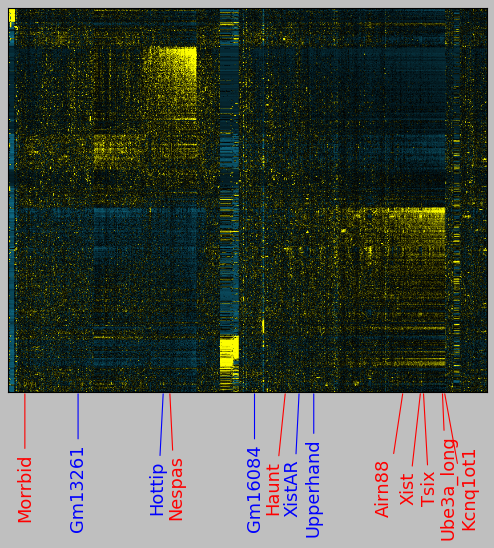

In [54]:
infile = '/home/jessime/Research/treeview/6mers01_M5_extend4_list.txt'
image = '/home/jessime/Research/pics/6mers01_M5_extend4.png'
outfile = '/home/jessime/Dropbox/kmer_paper/nature_genetics_reviews/6mers01_M5_extend4_cis-reg.pdf'
label_heatmap.main(label_dict, infile, image, outfile, fontsize=16, max_iter=2500)

## Extended data

In [21]:
v22_repressors = ['BDNF-AS-001',
'CDKN2B-AS1-001',
'KCNQ1OT1-001',
'SCAANT1-001',
'TSIX-001',
'XIST-001',
'UBE3A-ATS-001',
'MORRBID-001',
'NESPAS-US-001'
]

v22_activators = ['DBET-001',
'HOTAIRM1-001',
'HOTTIP-001',
'LINC00570-001',
'PCAT6-001',
'PVT1-001']

v22_label_dict = {
    'red': v22_repressors,
    'blue': v22_activators
}

In [47]:
!grep "BDNF-AS-001" /home/jessime/Research/v22_transcripts01_extend.fa
!grep "UBE3A-ATS-001" /home/jessime/Research/v22_transcripts01_extend.fa
!grep "MORRBID" /home/jessime/Research/v22_transcripts01_extend.fa
!grep "NESPAS-US" /home/jessime/Research/v22_transcripts01_extend.fa
!grep "HOTAIRM1-001" /home/jessime/Research/v22_transcripts01_extend.fa


>ENST00000501176.5|ENSG00000245573.6|OTTHUMG00000166125.5|OTTHUMT00000387960.1|BDNF-AS-001|BDNF-AS|1480|
>||||UBE3A-ATS-001||615410|
>||||MORRBID-001||1522|
>||||NESPAS-US-001||31986|
>ENST00000434063.3|ENSG00000233429.8|OTTHUMG00000158089.4|OTTHUMT00000139958.2|HOTAIRM1-001|HOTAIRM1|671|


In [22]:
M5_repressors = ['Airn88-201',
'Kcnq1ot1-001',
'Tsix-201',
'Xist-001',
'Ube3a_long-201',
'Haunt-001',
'Morrbid-001',
'Nespas-001'
]

M5_activators = ['Hottip-001',
'Gm16084-001',
'Gm13261-001',
'XistAR-201',
'Upperhand-201'
]

M5_label_dict = {
    'red': M5_repressors,
    'blue': M5_activators
}

In [48]:
!grep "XistAR" /home/jessime/Research/M5_transcripts01_extend4.fa
!grep "Upperhand" /home/jessime/Research/M5_transcripts01_extend4.fa


>||||XistAR-201||2789|
>ENSMUST00000186386.6||||Upperhand-201|AV026068|803|


In [49]:
!mkdir /home/jessime/Research/treeview/extend_redo

In [66]:
!mkdir /home/jessime/Dropbox/kmer_paper/nature_genetics_reviews/extend_redo

In [50]:
%aimport kmer_counts

In [51]:
%aimport fasta

In [52]:
def make_unique(names):
    seen = set()
    no_dups = []
    for n in names:
        new = n
        if n in seen:
            new += 'B'
        seen.add(n)
        no_dups.append(new)
    return no_dups

In [53]:
v22_transcripts = '/home/jessime/Research/v22_transcripts01_extend.fa'
M5_transcripts = '/home/jessime/Research/M5_transcripts01_extend4.fa'

v22_names = fasta.Extracter(v22_transcripts).get_names('common')
M5_names = fasta.Extracter(M5_transcripts).get_names('common')

v22_names = make_unique(v22_names)
M5_names = make_unique(M5_names)


In [ ]:
for i in range(1, 7):
    outfile = f'/home/jessime/Research/treeview/extend_redo/{i}mers01_v22_extend.csv'
    counter = kmer_counts.BasicCounter(v22_transcripts, outfile, k=i, binary=False, label=True)
    counter.make_count_file(v22_names)
    
    outfile = f'/home/jessime/Research/treeview/extend_redo/{i}mers01_M5_extend4.csv'
    counter = kmer_counts.BasicCounter(M5_transcripts, outfile, k=i, binary=False, label=True)
    counter.make_count_file(M5_names)

In [57]:
!Rscript treeview_cluster.r \
/home/jessime/Research/treeview/extend_redo/1mers01_v22_extend.csv \
/home/jessime/Research/treeview/extend_redo/1mers01_v22_extend.gtr \
/home/jessime/Research/treeview/extend_redo/1mers01_v22_extend.atr \
/home/jessime/Research/treeview/extend_redo/1mers01_v22_extend.cdt

In [8]:
!Rscript treeview_cluster.r \
/home/jessime/Research/treeview/extend_redo/2mers01_v22_extend.csv \
/home/jessime/Research/treeview/extend_redo/2mers01_v22_extend.gtr \
/home/jessime/Research/treeview/extend_redo/2mers01_v22_extend.atr \
/home/jessime/Research/treeview/extend_redo/2mers01_v22_extend.cdt

In [9]:
!Rscript treeview_cluster.r \
/home/jessime/Research/treeview/extend_redo/3mers01_v22_extend.csv \
/home/jessime/Research/treeview/extend_redo/3mers01_v22_extend.gtr \
/home/jessime/Research/treeview/extend_redo/3mers01_v22_extend.atr \
/home/jessime/Research/treeview/extend_redo/3mers01_v22_extend.cdt

In [10]:
!Rscript treeview_cluster.r \
/home/jessime/Research/treeview/extend_redo/4mers01_v22_extend.csv \
/home/jessime/Research/treeview/extend_redo/4mers01_v22_extend.gtr \
/home/jessime/Research/treeview/extend_redo/4mers01_v22_extend.atr \
/home/jessime/Research/treeview/extend_redo/4mers01_v22_extend.cdt

In [11]:
!Rscript treeview_cluster.r \
/home/jessime/Research/treeview/extend_redo/5mers01_v22_extend.csv \
/home/jessime/Research/treeview/extend_redo/5mers01_v22_extend.gtr \
/home/jessime/Research/treeview/extend_redo/5mers01_v22_extend.atr \
/home/jessime/Research/treeview/extend_redo/5mers01_v22_extend.cdt

In [12]:
!Rscript treeview_cluster.r \
/home/jessime/Research/treeview/extend_redo/6mers01_v22_extend.csv \
/home/jessime/Research/treeview/extend_redo/6mers01_v22_extend.gtr \
/home/jessime/Research/treeview/extend_redo/6mers01_v22_extend.atr \
/home/jessime/Research/treeview/extend_redo/6mers01_v22_extend.cdt

And mouse

In [ ]:
!Rscript treeview_cluster.r \
/home/jessime/Research/treeview/extend_redo/1mers01_M5_extend4.csv \
/home/jessime/Research/treeview/extend_redo/1mers01_M5_extend4.gtr \
/home/jessime/Research/treeview/extend_redo/1mers01_M5_extend4.atr \
/home/jessime/Research/treeview/extend_redo/1mers01_M5_extend4.cdt

In [13]:
!Rscript treeview_cluster.r \
/home/jessime/Research/treeview/extend_redo/2mers01_M5_extend4.csv \
/home/jessime/Research/treeview/extend_redo/2mers01_M5_extend4.gtr \
/home/jessime/Research/treeview/extend_redo/2mers01_M5_extend4.atr \
/home/jessime/Research/treeview/extend_redo/2mers01_M5_extend4.cdt

In [14]:
!Rscript treeview_cluster.r \
/home/jessime/Research/treeview/extend_redo/3mers01_M5_extend4.csv \
/home/jessime/Research/treeview/extend_redo/3mers01_M5_extend4.gtr \
/home/jessime/Research/treeview/extend_redo/3mers01_M5_extend4.atr \
/home/jessime/Research/treeview/extend_redo/3mers01_M5_extend4.cdt

In [15]:
!Rscript treeview_cluster.r \
/home/jessime/Research/treeview/extend_redo/4mers01_M5_extend4.csv \
/home/jessime/Research/treeview/extend_redo/4mers01_M5_extend4.gtr \
/home/jessime/Research/treeview/extend_redo/4mers01_M5_extend4.atr \
/home/jessime/Research/treeview/extend_redo/4mers01_M5_extend4.cdt

In [16]:
!Rscript treeview_cluster.r \
/home/jessime/Research/treeview/extend_redo/5mers01_M5_extend4.csv \
/home/jessime/Research/treeview/extend_redo/5mers01_M5_extend4.gtr \
/home/jessime/Research/treeview/extend_redo/5mers01_M5_extend4.atr \
/home/jessime/Research/treeview/extend_redo/5mers01_M5_extend4.cdt

In [17]:
!Rscript treeview_cluster.r \
/home/jessime/Research/treeview/extend_redo/6mers01_M5_extend4.csv \
/home/jessime/Research/treeview/extend_redo/6mers01_M5_extend4.gtr \
/home/jessime/Research/treeview/extend_redo/6mers01_M5_extend4.atr \
/home/jessime/Research/treeview/extend_redo/6mers01_M5_extend4.cdt

In [19]:
%aimport label_heatmap

In [29]:
for i in range(1, 7):
    infile = f'/home/jessime/Research/treeview/extend_redo/{i}mers01_v22_extend_list.txt'
    image = f'/home/jessime/Research/treeview/extend_redo/{i}mers01_v22_extend.png'
    outfile = f'/home/jessime/Dropbox/kmer_paper/nature_genetics_reviews/extend_redo/{i}mers01_v22_extend_cis-reg.pdf'
    label_heatmap.main(v22_label_dict, infile, image, outfile, fontsize=16, max_iter=2500)
    plt.clf()

In [30]:
for i in range(1, 7):
    infile = f'/home/jessime/Research/treeview/extend_redo/{i}mers01_M5_extend4_list.txt'
    image = f'/home/jessime/Research/treeview/extend_redo/{i}mers01_M5_extend4.png'
    outfile = f'/home/jessime/Dropbox/kmer_paper/nature_genetics_reviews/extend_redo/{i}mers01_M5_extend4_cis-reg.pdf'
    label_heatmap.main(M5_label_dict, infile, image, outfile, fontsize=16, max_iter=2500)
    plt.clf()

# Ulitsky's new homologs

> Hi Mauro,
> 
> Take a look at the attached. It compares the human GENCODE v26 lncRNAs with what we identified in the 2015 paper in the other species, using the same 3 approaches (whole genome alignment (WGA), Blast, and synteny). So you can see sequence homologs (WGA or Blast) and synteny homologs and both. You can then say that the methods are the same as in our paper. Let me know if this helps, and if you need some tweak on that, we can certainly do that as well. Also let me know if one of the columns is not clear.
> 
> Best Regards and good luck with your paper,
> 
> Igor.

This is going to be a bit of a naming and gene/transcript juggle, but here's the plan:

1. Find all ulitsky genes that have a potential mouse ortholog
2. Of those find genes that have a GENCODE annotation
3. For each of the mouse gene, liftover to mm10 and find GENCODE annotations
4. Do v22 <- (ulitsky human gene) -> (ulitsky ortholog) -> M5
5. Get -001 v22 and M5 transcripts for each gene pair left.
6. Test similarities

Not so bad, but there will be road bumps.

## genes with orthologs

In [69]:
orthologs = '/home/jessime/Research/ulitsky/gencode_orthologs.txt'
orthologs = pd.read_csv(orthologs, index_col=False, sep='\t')
orthologs = orthologs.set_index('GeneId')
print(orthologs.shape)

orthologs = orthologs.loc[:, :'Mouse Sequence+Synteny']
print(orthologs.shape)
orthologs.head()

(60492, 72)
(60492, 12)


Symbol                    Type  \
GeneId                                                     
ENSG00000266575.1_2    [BOLA2P1]  [processed_pseudogene]   
ENSG00000127528.5_2       [KLF2]        [protein_coding]   
ENSG00000257927.1_2   [MRPS36P5]  [processed_pseudogene]   
ENSG00000166920.12_3  [C15orf48]        [protein_coding]   
ENSG00000130305.16_2     [NSUN5]        [protein_coding]   

                                            TranscriptsWithConservation  \
GeneId                                                                    
ENSG00000266575.1_2                               [ENST00000584794.1_1]   
ENSG00000127528.5_2          [ENST00000248071.5_1, ENST00000592003.1_1]   
ENSG00000257927.1_2                               [ENST00000551909.1_1]   
ENSG00000166920.12_3  [ENST00000344300.3_1, ENST00000396650.6_1, ENS...   
ENSG00000130305.16_2  [ENST00000252594.10_1, ENST00000310326.8_2, EN...   

                     SpeciesWithOrthologs  SpeciesWithBLAST SpeciesWithWGA  \
GeneId                                                                       
ENSG00000266575.1_2                    []                []             []   
ENSG00000127528.5_2      [Mouse, Tilapia]  [Mouse, Tilapia]             []   
ENSG00000257927.1_2              [Rabbit]          [Rabbit]             []   
ENSG00000166920.12_3         [Dog, Mouse]      [Dog, Mouse]          [Dog]   
ENSG00000130305.16_2          [Zebrafish]       [Zebrafish]             []   

                     SpeciesWithSynteny  \
GeneId                                    
ENSG00000266575.1_2                  []   
ENSG00000127528.5_2    [Mouse, Tilapia]   
ENSG00000257927.1_2            [Rabbit]   
ENSG00000166920.12_3            [Mouse]   
ENSG00000130305.16_2        [Zebrafish]   

                                          SpeciesWithSequenceAndSynteny  \
GeneId                                                                    
ENSG00000266575.1_2                        [Chicken, Lizard, Zebrafish]   
ENSG00000127528.5_2                                     [Mouse, Rhesus]   
ENSG00000257927.1_2   [Ferret, Lizard, Mouse, Opossum, Rabbit, Rhesu...   
ENSG00000166920.12_3                                          [Opossum]   
ENSG00000130305.16_2                            [Dog, Ferret, Marmoset]   

                     Mouse BLAST Mouse WGA  \
GeneId                                       
ENSG00000266575.1_2           []       NaN   
ENSG00000127528.5_2           []       NaN   
ENSG00000257927.1_2           []       NaN   
ENSG00000166920.12_3          []       NaN   
ENSG00000130305.16_2          []       NaN   

                                                          Mouse Synteny  \
GeneId                                                                    
ENSG00000266575.1_2                                                 NaN   
ENSG00000127528.5_2   [linc|3P|XLOC_114445|TCONS_00227749|Eps15l1:14...   
ENSG00000257927.1_2                                                 NaN   
ENSG00000166920.12_3  [EnsASCoding|3P|XLOC_068793|TCONS_00136115|AA4...   
ENSG00000130305.16_2                                                NaN   

                                                 Mouse Sequence+Synteny  
GeneId                                                                   
ENSG00000266575.1_2                                                 NaN  
ENSG00000127528.5_2   [linc|3P|XLOC_113131|TCONS_00223825|Ap1m1:9.60...  
ENSG00000257927.1_2   [LongAUGORFlinc|3P|XLOC_043726|TCONS_00084378|...  
ENSG00000166920.12_3                                                NaN  
ENSG00000130305.16_2                                                NaN

In [70]:
mouse_seqs_syn = orthologs[~orthologs['Mouse Sequence+Synteny'].isnull()]
print(mouse_seqs_syn.shape)
mouse_seqs_syn.head()

(30021, 12)


Symbol                    Type  \
GeneId                                                         
ENSG00000127528.5_2           [KLF2]        [protein_coding]   
ENSG00000257927.1_2       [MRPS36P5]  [processed_pseudogene]   
ENSG00000255084.1_2  [RP11-843A23.1]             [antisense]   
ENSG00000189145.7_2   [RP11-77G22.2]  [processed_pseudogene]   
ENSG00000124209.3_2         [RAB22A]        [protein_coding]   

                                    TranscriptsWithConservation  \
GeneId                                                            
ENSG00000127528.5_2  [ENST00000248071.5_1, ENST00000592003.1_1]   
ENSG00000257927.1_2                       [ENST00000551909.1_1]   
ENSG00000255084.1_2                       [ENST00000526976.1_1]   
ENSG00000189145.7_2                       [ENST00000342691.5_1]   
ENSG00000124209.3_2  [ENST00000244040.3_1, ENST00000488949.1_1]   

                    SpeciesWithOrthologs  SpeciesWithBLAST SpeciesWithWGA  \
GeneId                                                                      
ENSG00000127528.5_2     [Mouse, Tilapia]  [Mouse, Tilapia]             []   
ENSG00000257927.1_2             [Rabbit]          [Rabbit]             []   
ENSG00000255084.1_2                   []                []             []   
ENSG00000189145.7_2                   []                []             []   
ENSG00000124209.3_2              [Mouse]           [Mouse]             []   

                    SpeciesWithSynteny  \
GeneId                                   
ENSG00000127528.5_2   [Mouse, Tilapia]   
ENSG00000257927.1_2           [Rabbit]   
ENSG00000255084.1_2                 []   
ENSG00000189145.7_2                 []   
ENSG00000124209.3_2            [Mouse]   

                                         SpeciesWithSequenceAndSynteny  \
GeneId                                                                   
ENSG00000127528.5_2                                    [Mouse, Rhesus]   
ENSG00000257927.1_2  [Ferret, Lizard, Mouse, Opossum, Rabbit, Rhesu...   
ENSG00000255084.1_2                [Coelacanth, Ferret, Mouse, Rhesus]   
ENSG00000189145.7_2                           [Chicken, Mouse, Rabbit]   
ENSG00000124209.3_2                                    [Mouse, Rabbit]   

                    Mouse BLAST Mouse WGA  \
GeneId                                      
ENSG00000127528.5_2          []       NaN   
ENSG00000257927.1_2          []       NaN   
ENSG00000255084.1_2          []       NaN   
ENSG00000189145.7_2          []       NaN   
ENSG00000124209.3_2          []       NaN   

                                                         Mouse Synteny  \
GeneId                                                                   
ENSG00000127528.5_2  [linc|3P|XLOC_114445|TCONS_00227749|Eps15l1:14...   
ENSG00000257927.1_2                                                NaN   
ENSG00000255084.1_2                                                NaN   
ENSG00000189145.7_2                                                NaN   
ENSG00000124209.3_2  [LongAUGORFEnsASCoding|3P|XLOC_069450|TCONS_00...   

                                                Mouse Sequence+Synteny  
GeneId                                                                  
ENSG00000127528.5_2  [linc|3P|XLOC_113131|TCONS_00223825|Ap1m1:9.60...  
ENSG00000257927.1_2  [LongAUGORFlinc|3P|XLOC_043726|TCONS_00084378|...  
ENSG00000255084.1_2  [linc|3P|XLOC_107138|TCONS_00214197:13.9998|13...  
ENSG00000189145.7_2  [linc|3P|XLOC_125576|TCONS_00247231|Atp6ap2:8....  
ENSG00000124209.3_2  [LongAUGORFlinc|3P|XLOC_067125|TCONS_00130220|...

Okay, so I have 30k v26 genes (including protein coding) that have transcripts in the mouse ortholog column. 

## human GENCODE match

This is going to be two steps. The first thing we need to is what the conversion is between v26 and v22. Can I just match names? I'm going to take Mauro's recommendation and check the overlap in coordinates.

In [91]:
v26_gencode = '/home/jessime/Research/gencode/gencode.v26.annotation.gtf'
v26_gencode = pd.read_csv(v26_gencode, skiprows=5, sep='\t', header=None)
v26_gencode.head()

0       1           2      3      4  5  6  7  \
0  chr1  HAVANA        gene  11869  14409  .  +  .   
1  chr1  HAVANA  transcript  11869  14409  .  +  .   
2  chr1  HAVANA        exon  11869  12227  .  +  .   
3  chr1  HAVANA        exon  12613  12721  .  +  .   
4  chr1  HAVANA        exon  13221  14409  .  +  .   

                                                   8  
0  gene_id "ENSG00000223972.5"; gene_type "transc...  
1  gene_id "ENSG00000223972.5"; transcript_id "EN...  
2  gene_id "ENSG00000223972.5"; transcript_id "EN...  
3  gene_id "ENSG00000223972.5"; transcript_id "EN...  
4  gene_id "ENSG00000223972.5"; transcript_id "EN...

In [92]:
v26_genes = v26_gencode[v26_gencode[2] == 'gene']
outfile = '/home/jessime/Research/gencode/v26_genes.gtf'
v26_genes.to_csv(outfile, header=False, index=False, sep='\t')

In [93]:
v22_lncs_gencode = '/home/jessime/Research/gencode/gencode.v22.long_noncoding_RNAs.gtf'
v22_lncs_gencode = pd.read_csv(v22_lncs_gencode, skiprows=5, sep='\t', header=None)
v22_lncs_gencode.head()

0       1           2      3      4  5  6  7  \
0  chr1  HAVANA        gene  29554  31109  .  +  .   
1  chr1  HAVANA  transcript  29554  31097  .  +  .   
2  chr1  HAVANA        exon  29554  30039  .  +  .   
3  chr1  HAVANA        exon  30564  30667  .  +  .   
4  chr1  HAVANA        exon  30976  31097  .  +  .   

                                                   8  
0  gene_id "ENSG00000243485.3"; gene_type "lincRN...  
1  gene_id "ENSG00000243485.3"; transcript_id "EN...  
2  gene_id "ENSG00000243485.3"; transcript_id "EN...  
3  gene_id "ENSG00000243485.3"; transcript_id "EN...  
4  gene_id "ENSG00000243485.3"; transcript_id "EN...

In [95]:
v22_genes = v22_lncs_gencode[v22_lncs_gencode[2] == 'gene']
outfile = '/home/jessime/Research/gencode/v22_lncRNA_genes.gtf'
v22_genes.to_csv(outfile, header=False, index=False, sep='\t')

```bash
bedtools intersect -s -wa -wb -r -f .99 -a v22_lncRNA_genes.gtf -b v26_genes.gtf > ~/Desktop/v22_v26_double.tab
```

Now, the question is, for each of these genes, do the gene_ids match?

In [109]:
def gene_diff(line):
    data = line.split('\t')
    g1 = data[8].split(';')[0]
    g2 = data[17].split(';')[0]
    if g1.split('.')[0] != g2.split('.')[0]: print(g1, g2)
    return g1 != g2
        
with open('/home/jessime/Desktop/v22_v26_double.tab') as infile:
    print(sum(gene_diff(line) for line in infile))

"gene_id ""ENSG00000280777.1"" "gene_id ""ENSG00000283122.1""
"gene_id ""ENSG00000219545.8"" "gene_id ""ENSG00000283549.1""
"gene_id ""ENSG00000254144.3"" "gene_id ""ENSG00000275558.1""
"gene_id ""ENSG00000264299.1"" "gene_id ""ENSG00000283866.1""
"gene_id ""ENSG00000281445.1"" "gene_id ""ENSG00000282977.1""
"gene_id ""ENSG00000258486.3"" "gene_id ""ENSG00000283029.1""
"gene_id ""ENSG00000258486.3"" "gene_id ""ENSG00000276168.1""
"gene_id ""ENSG00000281535.1"" "gene_id ""ENSG00000259383.1""
"gene_id ""ENSG00000259176.4"" "gene_id ""ENSG00000284500.1""
"gene_id ""ENSG00000261550.1"" "gene_id ""ENSG00000277639.2""
"gene_id ""ENSG00000269640.4"" "gene_id ""ENSG00000282851.1""
"gene_id ""ENSG00000213971.6"" "gene_id ""ENSG00000284428.1""
"gene_id ""ENSG00000267243.4"" "gene_id ""ENSG00000283403.1""
"gene_id ""ENSG00000237517.7"" "gene_id ""ENSG00000283406.1""
"gene_id ""ENSGR0000226179.4"" "gene_id ""ENSG00000226179.6_PAR_Y""
"gene_id ""ENSGR0000281849.1"" "gene_id ""ENSG00000281849.3_PAR_

**Important: Gene names are the same (with a handful of exceptions printed out above), if you do not consider gene version number, which is the number that comes after the decimal place. If you try to match that, you fail in a couple thousand cases.** 

Now the second part is, let's filter ulitsky's rows for the gene's that I have a match for.

In [110]:
%aimport fasta

In [115]:
infasta = '/home/jessime/Research/v22_transcripts01.fa'

extracter = fasta.Extracter(infasta)
v22_gene_names = extracter.get_names('ensembl_gene')
v22_gene_names_no_v = [n.split('.')[0] for n in v22_gene_names]
v22_gene_names_no_v[:5]

['ENSG00000243485',
 'ENSG00000237613',
 'ENSG00000238009',
 'ENSG00000238009',
 'ENSG00000239945']

In [116]:
v22_gene_names_no_v = set(v22_gene_names_no_v)

In [120]:
def human_transcript_match(row):
    return row.name.split('.')[0] in v22_gene_names_no_v
    
h_match = mouse_seqs_syn.apply(human_transcript_match, axis=1)
mouse_seqs_syn_match = mouse_seqs_syn[h_match]
print(mouse_seqs_syn_match.shape)
mouse_seqs_syn_match.head()

(8125, 12)


Symbol              Type  \
GeneId                                                   
ENSG00000255084.1_2  [RP11-843A23.1]       [antisense]   
ENSG00000276517.1_2     [AL133243.2]  [sense_intronic]   
ENSG00000253716.5_2          [MINCR]       [antisense]   
ENSG00000258742.5_2  [RP11-862G15.1]         [lincRNA]   
ENSG00000279450.1_2    [RP11-54F2.8]             [TEC]   

                                           TranscriptsWithConservation  \
GeneId                                                                   
ENSG00000255084.1_2                              [ENST00000526976.1_1]   
ENSG00000276517.1_2                              [ENST00000617415.1_1]   
ENSG00000253716.5_2  [ENST00000517411.1_1, ENST00000518073.1_1, ENS...   
ENSG00000258742.5_2  [ENST00000553485.1_1, ENST00000554653.5_1, ENS...   
ENSG00000279450.1_2                              [ENST00000625015.1_1]   

                    SpeciesWithOrthologs SpeciesWithBLAST SpeciesWithWGA  \
GeneId                                                                     
ENSG00000255084.1_2                   []               []             []   
ENSG00000276517.1_2              [Mouse]          [Mouse]             []   
ENSG00000253716.5_2        [Dog, Rhesus]    [Dog, Rhesus]       [Rhesus]   
ENSG00000258742.5_2        [Dog, Rhesus]    [Dog, Rhesus]       [Rhesus]   
ENSG00000279450.1_2                   []               []             []   

                    SpeciesWithSynteny  \
GeneId                                   
ENSG00000255084.1_2                 []   
ENSG00000276517.1_2            [Mouse]   
ENSG00000253716.5_2      [Dog, Rhesus]   
ENSG00000258742.5_2      [Dog, Rhesus]   
ENSG00000279450.1_2                 []   

                                     SpeciesWithSequenceAndSynteny  \
GeneId                                                               
ENSG00000255084.1_2            [Coelacanth, Ferret, Mouse, Rhesus]   
ENSG00000276517.1_2                                [Mouse, Rhesus]   
ENSG00000253716.5_2          [Dog, Mouse, Opossum, Rabbit, Rhesus]   
ENSG00000258742.5_2  [Coelacanth, Ferret, Marmoset, Mouse, Rhesus]   
ENSG00000279450.1_2                                   [Dog, Mouse]   

                    Mouse BLAST Mouse WGA  \
GeneId                                      
ENSG00000255084.1_2          []       NaN   
ENSG00000276517.1_2          []       NaN   
ENSG00000253716.5_2       [Dog]       NaN   
ENSG00000258742.5_2    [Rhesus]       NaN   
ENSG00000279450.1_2          []       NaN   

                                                         Mouse Synteny  \
GeneId                                                                   
ENSG00000255084.1_2                                                NaN   
ENSG00000276517.1_2  [LongAUGORFEnsASCoding|3P|XLOC_054201|TCONS_00...   
ENSG00000253716.5_2                                                NaN   
ENSG00000258742.5_2                                                NaN   
ENSG00000279450.1_2                                                NaN   

                                                Mouse Sequence+Synteny  
GeneId                                                                  
ENSG00000255084.1_2  [linc|3P|XLOC_107138|TCONS_00214197:13.9998|13...  
ENSG00000276517.1_2  [linc|3P|XLOC_052988|TCONS_00100809|Ttc27:3.67...  
ENSG00000253716.5_2  [linc|3P|XLOC_043467|TCONS_00083522|Top1mt:2.9...  
ENSG00000258742.5_2  [linc|3P|XLOC_022448|TCONS_00046841:4.60374|12...  
ENSG00000279450.1_2  [linc|3P|XLOC_043112|TCONS_00082436|6-Mar:4.76...

In [121]:
mouse_seqs_syn_match['Type'].value_counts()

[lincRNA]                               3839
[antisense]                             2823
[TEC]                                    506
[sense_intronic]                         499
[processed_transcript]                   248
[sense_overlapping]                       95
[protein_coding]                          56
[transcribed_unprocessed_pseudogene]      25
[3prime_overlapping_ncRNA]                18
[transcribed_unitary_pseudogene]          11
[transcribed_processed_pseudogene]         4
[scRNA]                                    1
Name: Type, dtype: int64

## Liftover

I need to get these mm9 mouse seqs to mm10

In [87]:
ulitsky_mm9_bed = '/home/jessime/Research/ulitsky/mm9.lncRNAs.bed'
ulitsky_mm9_bed = pd.read_csv(ulitsky_mm9_bed, sep='\t', header=None)
print(ulitsky_mm9_bed.shape)
ulitsky_mm9_bed.head()

(24643, 12)


0        1        2                                                  3   \
0  chr1  3134628  3138305  linc|3P|XLOC_003639|TCONS_00011510:0.242551|10...   
1  chr1  3456667  3503634  linc|3P|XLOC_000003|TCONS_00000003:0.483846|58...   
2  chr1  3863292  3883831  linc|3P|XLOC_003652|TCONS_00011523:0.658613|93...   
3  chr1  3863292  3898693  linc|3P|XLOC_003652|TCONS_00011524:0.723196|93...   
4  chr1  3863292  3931836  linc|3P|XLOC_003652|TCONS_00011526:0.296657|93...   

     4  5        6        7        8   9             10             11  
0  1000  .  3137977  3138121  0,0,250   2      315,512,        0,3165,  
1  1000  +  3456672  3503560  250,0,0   2      101,149,       0,46818,  
2  1000  .  3863415  3883796  0,0,250   3   189,162,53,  0,6327,20486,  
3  1000  .  3898412  3898658  0,0,250   3  188,163,299,  0,6326,35102,  
4  1000  .  3869708  3931801  0,0,250   3  188,163,208,  0,6326,68336,

I think these goofy names are messing me up. I'm going to convert them to something simple, keep track of the conversion, and see what happens.

In [122]:
ulitsky_mm9_names = ulitsky_mm9_bed[3].copy()

ulitsky_mm9_bed[3] = ulitsky_mm9_bed.index.values
ulitsky_mm9_bed.head()

0        1        2   3     4  5        6        7        8   9   \
0  chr1  3134628  3138305   0  1000  .  3137977  3138121  0,0,250   2   
1  chr1  3456667  3503634   1  1000  +  3456672  3503560  250,0,0   2   
2  chr1  3863292  3883831   2  1000  .  3863415  3883796  0,0,250   3   
3  chr1  3863292  3898693   3  1000  .  3898412  3898658  0,0,250   3   
4  chr1  3863292  3931836   4  1000  .  3869708  3931801  0,0,250   3   

             10             11  
0      315,512,        0,3165,  
1      101,149,       0,46818,  
2   189,162,53,  0,6327,20486,  
3  188,163,299,  0,6326,35102,  
4  188,163,208,  0,6326,68336,

In [125]:
ulitsky_mm9_bed[5].value_counts()

+    9290
-    8244
.    7109
Name: 5, dtype: int64

In [123]:
outfile = '/home/jessime/Research/ulitsky/mm9_lift_prep.bed'
mm9_lift_prep = ulitsky_mm9_bed.loc[:, :5]
mm9_lift_prep.to_csv(outfile, header=False, index=False, sep='\t')

That appears to have worked.

In [126]:
mm10_liftover = '/home/jessime/Research/ulitsky/mm10_liftover.bed'
mm10_liftover = pd.read_csv(mm10_liftover, header=None, sep='\t')
print(mm10_liftover.shape)
mm10_liftover.head()

(24521, 6)


0        1        2  3     4  5
0  chr1  3144547  3148224  0  1000  .
1  chr1  3466586  3513553  1  1000  +
2  chr1  3873211  3893750  2  1000  .
3  chr1  3873211  3908612  3  1000  .
4  chr1  3873211  3941755  4  1000  .

I just realized that a lot of this ulitsky data isn't stranded, which we pretty much need to have. So we have to drop the non-stranded.

In [127]:
mm10_stranded = mm10_liftover[mm10_liftover[5] != '.']
print(mm10_stranded.shape)
mm10_stranded.head()

(17418, 6)


0        1        2   3     4  5
1   chr1  3466586  3513553   1  1000  +
5   chr1  4243421  4409304   5  1000  +
6   chr1  4256403  4258805   6  1000  +
10  chr1  4704026  4763172  10  1000  -
11  chr1  4718263  4772547  11  1000  -

In [129]:
outfile = '/home/jessime/Research/ulitsky/mm10_stranded.bed'
mm10_stranded.to_csv(outfile, header=False, index=False, sep='\t')

## mouse GENCODE match

For every M5 mouse gene, can I find **any** amount of overlap with a ulitsky lncRNA?

In [130]:
%aimport gtf

In [131]:
m5_gencode = '/home/jessime/Research/gencode/gencode.vM5.long_noncoding_RNAs.gtf'
m5_gencode = gtf.Maker(m5_gencode, skiprows=5)
print(m5_gencode.inGTF.shape)
m5_gencode.inGTF.head()

(50128, 9)


seqname  source     feature    start      end score strand frame  \
0    chr1  HAVANA        gene  3073253  3074322     .      +     .   
1    chr1  HAVANA  transcript  3073253  3074322     .      +     .   
2    chr1  HAVANA        exon  3073253  3074322     .      +     .   
3    chr1  HAVANA        gene  3365731  3368549     .      -     .   
4    chr1  HAVANA  transcript  3365731  3368549     .      -     .   

                                           attribute  
0  gene_id "ENSMUSG00000102693.1"; gene_type "TEC...  
1  gene_id "ENSMUSG00000102693.1"; transcript_id ...  
2  gene_id "ENSMUSG00000102693.1"; transcript_id ...  
3  gene_id "ENSMUSG00000103377.1"; gene_type "TEC...  
4  gene_id "ENSMUSG00000103377.1"; transcript_id ...

In [132]:
m5_gencode.filter_feature('gene')
m5_gencode.outGTF = '/home/jessime/Research/gencode/M5_genes.gtf'
m5_gencode.save(m5_gencode.featureDF)

In [133]:
!bedtools intersect -s -wa -wb \
-a /home/jessime/Research/gencode/M5_genes.gtf \
-b /home/jessime/Research/ulitsky/mm10_stranded.bed > \
/home/jessime/Research/ulitsky/M5_ulitsky.tab

In [139]:
def get_gene_name(row):
    return row[8].split(';')[0].split()[1].strip('"')

In [142]:
M5_ulitsky = '/home/jessime/Research/ulitsky/M5_ulitsky.tab'
M5_ulitsky = pd.read_csv(M5_ulitsky, header=None, sep='\t')
M5_ulitsky['gene_id'] = M5_ulitsky.apply(get_gene_name, axis=1)
M5_ulitsky.rename(columns={12:'ulitsky_num'}, inplace=True)
M5_ulitsky.head()

0       1     2        3        4  5  6  7  \
0  chr1  HAVANA  gene  3466587  3513553  0  +  0   
1  chr1  HAVANA  gene  7349406  7397869  0  -  0   
2  chr1  HAVANA  gene  7349406  7397869  0  -  0   
3  chr1  HAVANA  gene  7349406  7397869  0  -  0   
4  chr1  HAVANA  gene  7349406  7397869  0  -  0   

                                                   8     9       10       11  \
0  gene_id "ENSMUSG00000089699.1"; gene_type "ant...  chr1  3466586  3513553   
1  gene_id "ENSMUSG00000097797.3"; gene_type "lin...  chr1  7376752  7398937   
2  gene_id "ENSMUSG00000097797.3"; gene_type "lin...  chr1  7314667  7398937   
3  gene_id "ENSMUSG00000097797.3"; gene_type "lin...  chr1  7314667  7398937   
4  gene_id "ENSMUSG00000097797.3"; gene_type "lin...  chr1  7314667  7398937   

   ulitsky_num    13 14               gene_id  
0            1  1000  +  ENSMUSG00000089699.1  
1           35  1000  -  ENSMUSG00000097797.3  
2           31  1000  -  ENSMUSG00000097797.3  
3           32  1000  -  ENSMUSG00000097797.3  
4           33  1000  -  ENSMUSG00000097797.3

## v22 to M5 mapping

Do:

v22_transcript <- v22 <- **(ulitsky human gene)** -> (ulitsky ortholog) -> M5 -> M5_transcript

At the end of this, I want a csv. The first column is human v22 genes and the second mouse M5 genes.

In [266]:
final = mouse_seqs_syn_match.reset_index().copy()
print(final.shape)
final = final[final['SpeciesWithOrthologs'].str.contains('Mouse')]
print(final.shape)
final.head()

(8125, 13)
(1811, 13)


GeneId           Symbol              Type  \
1   ENSG00000276517.1_2     [AL133243.2]  [sense_intronic]   
8   ENSG00000279497.1_3  [RP11-654C20.1]             [TEC]   
9   ENSG00000257839.1_2   [RP11-290L1.2]       [antisense]   
11  ENSG00000230530.1_2      [LIMD1-AS1]       [antisense]   
15  ENSG00000272817.1_2  [RP11-402D21.2]       [antisense]   

                   TranscriptsWithConservation SpeciesWithOrthologs  \
1                        [ENST00000617415.1_1]              [Mouse]   
8                        [ENST00000622964.1_1]              [Mouse]   
9                        [ENST00000547721.1_1]         [Dog, Mouse]   
11  [ENST00000427644.1_1, ENST00000429798.1_1]    [Marmoset, Mouse]   
15                       [ENST00000610263.1_1]              [Mouse]   

     SpeciesWithBLAST SpeciesWithWGA SpeciesWithSynteny  \
1             [Mouse]             []            [Mouse]   
8             [Mouse]             []            [Mouse]   
9        [Dog, Mouse]          [Dog]       [Dog, Mouse]   
11  [Marmoset, Mouse]             []  [Marmoset, Mouse]   
15            [Mouse]             []            [Mouse]   

                        SpeciesWithSequenceAndSynteny Mouse BLAST Mouse WGA  \
1                                     [Mouse, Rhesus]          []       NaN   
8                           [Marmoset, Mouse, Rhesus]          []       NaN   
9   [Chicken, Dog, Ferret, Marmoset, Mouse, Opossu...       [Dog]       NaN   
11  [Coelacanth, Ferret, Marmoset, Mouse, Opossum,...  [Marmoset]       NaN   
15                       [Coelacanth, Mouse, Opossum]          []       NaN   

                                        Mouse Synteny  \
1   [LongAUGORFEnsASCoding|3P|XLOC_054201|TCONS_00...   
8   [EnsASCoding|3P|XLOC_120553|TCONS_00239072|Opc...   
9   [linc|3P|XLOC_010197|TCONS_00020692|Nap1l1:13....   
11  [LongAUGORFEnsASCoding|3P|XLOC_121663|TCONS_00...   
15  [LongAUGORFEnsASCoding|3P|XLOC_063349|TCONS_00...   

                               Mouse Sequence+Synteny  
1   [linc|3P|XLOC_052988|TCONS_00100809|Ttc27:3.67...  
8   [linc|3P|XLOC_119051|TCONS_00234199:0.392415|8...  
9   [linc|3P|XLOC_011435|TCONS_00024573:0.289102|1...  
11  [linc|3P|XLOC_121661|TCONS_00242757|Lars2:1.19...  
15  [linc|3P|XLOC_062660|TCONS_00118281|Tnks2:1.06...

In [267]:
final['v26'] = final.apply(lambda row: row['GeneId'].split('_')[0], axis=1)
final = final[['v26', 'Mouse Sequence+Synteny']].copy()
print(final.shape)
final.head()

(1811, 2)


v26                             Mouse Sequence+Synteny
1   ENSG00000276517.1  [linc|3P|XLOC_052988|TCONS_00100809|Ttc27:3.67...
8   ENSG00000279497.1  [linc|3P|XLOC_119051|TCONS_00234199:0.392415|8...
9   ENSG00000257839.1  [linc|3P|XLOC_011435|TCONS_00024573:0.289102|1...
11  ENSG00000230530.1  [linc|3P|XLOC_121661|TCONS_00242757|Lars2:1.19...
15  ENSG00000272817.1  [linc|3P|XLOC_062660|TCONS_00118281|Tnks2:1.06...

In [268]:
final['no_version'] = final['v26'].apply(lambda x: x.split('.')[0])
print(final.shape)
final.head()

(1811, 3)


v26                             Mouse Sequence+Synteny  \
1   ENSG00000276517.1  [linc|3P|XLOC_052988|TCONS_00100809|Ttc27:3.67...   
8   ENSG00000279497.1  [linc|3P|XLOC_119051|TCONS_00234199:0.392415|8...   
9   ENSG00000257839.1  [linc|3P|XLOC_011435|TCONS_00024573:0.289102|1...   
11  ENSG00000230530.1  [linc|3P|XLOC_121661|TCONS_00242757|Lars2:1.19...   
15  ENSG00000272817.1  [linc|3P|XLOC_062660|TCONS_00118281|Tnks2:1.06...   

         no_version  
1   ENSG00000276517  
8   ENSG00000279497  
9   ENSG00000257839  
11  ENSG00000230530  
15  ENSG00000272817

In [269]:
v22_transcript_names = extracter.get_names('ensembl')
v22_common = extracter.get_names('common')

v22_gene_names_no_v = [n.split('.')[0] for n in v22_gene_names] #I overwrote this as a set earlier

human_names_df = pd.DataFrame.from_dict({'no_version': v22_gene_names_no_v,
                                         'v22_genes': v22_gene_names,
                                         'v22_transcripts': v22_transcript_names,
                                         'v22_common': v22_common})
print(human_names_df.shape)
human_names_df.head()

(15953, 4)


no_version        v22_common          v22_genes    v22_transcripts
0  ENSG00000243485  RP11-34P13.3-001  ENSG00000243485.3  ENST00000473358.1
1  ENSG00000237613       FAM138A-001  ENSG00000237613.2  ENST00000417324.1
2  ENSG00000238009  RP11-34P13.7-001  ENSG00000238009.5  ENST00000466430.4
3  ENSG00000238009  RP11-34P13.7-201  ENSG00000238009.5  ENST00000610542.1
4  ENSG00000239945  RP11-34P13.8-001  ENSG00000239945.1  ENST00000495576.1

In [270]:
final = pd.merge(final, human_names_df, how='left', on='no_version')
print(final.shape)
final = final.drop_duplicates(subset='no_version')
print(final.shape)
final.head()

(1851, 6)
(1811, 6)


v26                             Mouse Sequence+Synteny  \
0  ENSG00000276517.1  [linc|3P|XLOC_052988|TCONS_00100809|Ttc27:3.67...   
1  ENSG00000279497.1  [linc|3P|XLOC_119051|TCONS_00234199:0.392415|8...   
2  ENSG00000257839.1  [linc|3P|XLOC_011435|TCONS_00024573:0.289102|1...   
3  ENSG00000230530.1  [linc|3P|XLOC_121661|TCONS_00242757|Lars2:1.19...   
4  ENSG00000272817.1  [linc|3P|XLOC_062660|TCONS_00118281|Tnks2:1.06...   

        no_version         v22_common          v22_genes    v22_transcripts  
0  ENSG00000276517     AL133243.2-001  ENSG00000276517.1  ENST00000617415.1  
1  ENSG00000279497  RP11-654C20.1-001  ENSG00000279497.1  ENST00000622964.1  
2  ENSG00000257839   RP11-290L1.2-001  ENSG00000257839.1  ENST00000547721.1  
3  ENSG00000230530      LIMD1-AS1-001  ENSG00000230530.1  ENST00000427644.1  
4  ENSG00000272817  RP11-402D21.2-001  ENSG00000272817.1  ENST00000610263.1

I've gotten all the way to the v22 transcript names. Now I have to parse these mouse names to mouse m5 transcripts. The first thing I have to do is match these crazy names to row numbers that I used for liftover.

In [271]:
ulitsky_mm9_names.head()

0    linc|3P|XLOC_003639|TCONS_00011510:0.242551|10...
1    linc|3P|XLOC_000003|TCONS_00000003:0.483846|58...
2    linc|3P|XLOC_003652|TCONS_00011523:0.658613|93...
3    linc|3P|XLOC_003652|TCONS_00011524:0.723196|93...
4    linc|3P|XLOC_003652|TCONS_00011526:0.296657|93...
Name: 3, dtype: object

In [272]:
M5_ulitsky.head()

0       1     2        3        4  5  6  7  \
0  chr1  HAVANA  gene  3466587  3513553  0  +  0   
1  chr1  HAVANA  gene  7349406  7397869  0  -  0   
2  chr1  HAVANA  gene  7349406  7397869  0  -  0   
3  chr1  HAVANA  gene  7349406  7397869  0  -  0   
4  chr1  HAVANA  gene  7349406  7397869  0  -  0   

                                                   8     9       10       11  \
0  gene_id "ENSMUSG00000089699.1"; gene_type "ant...  chr1  3466586  3513553   
1  gene_id "ENSMUSG00000097797.3"; gene_type "lin...  chr1  7376752  7398937   
2  gene_id "ENSMUSG00000097797.3"; gene_type "lin...  chr1  7314667  7398937   
3  gene_id "ENSMUSG00000097797.3"; gene_type "lin...  chr1  7314667  7398937   
4  gene_id "ENSMUSG00000097797.3"; gene_type "lin...  chr1  7314667  7398937   

   ulitsky_num    13 14               gene_id  
0            1  1000  +  ENSMUSG00000089699.1  
1           35  1000  -  ENSMUSG00000097797.3  
2           31  1000  -  ENSMUSG00000097797.3  
3           32  1000  -  ENSMUSG00000097797.3  
4           33  1000  -  ENSMUSG00000097797.3

In [273]:
ulitsky_mm9_dict = {n:i for i, n in ulitsky_mm9_names.iteritems()}
num2gene_dict = {row['ulitsky_num']: row['gene_id'] for i, row in M5_ulitsky.iterrows()}

In [274]:
def mouse_ultisky2gene(row):
    ulitsky_txns = row['Mouse Sequence+Synteny'].strip('[]').split(', ')
    for ut in ulitsky_txns:
        try:
            n = ulitsky_mm9_dict[ut]
            gene = num2gene_dict[n]
            return gene
        except KeyError:
            pass
    #raise ValueError(f'None of {ulitsky_txns} have a gene id for row {row.name}')
    return np.nan

In [287]:
infasta = '/home/jessime/Research/M5_transcripts01.fa'
extracter_M5 = fasta.Extracter(infasta)
M5_genes_fasta = extracter_M5.get_names('ensembl_gene')
M5_common_fasta = extracter_M5.get_names('common')
M5_genes_common_dict = dict(zip(M5_genes_fasta, M5_common_fasta))

In [288]:
final['M5_genes'] = final.apply(mouse_ultisky2gene, axis=1)
final['M5_common'] = final['M5_genes'].map(M5_genes_common_dict)
print(final.shape)
final = final[~final['M5_genes'].isnull()]
print(final.shape)
final.head()

(1001, 8)
(1001, 8)


v26                             Mouse Sequence+Synteny  \
1   ENSG00000279497.1  [linc|3P|XLOC_119051|TCONS_00234199:0.392415|8...   
2   ENSG00000257839.1  [linc|3P|XLOC_011435|TCONS_00024573:0.289102|1...   
5   ENSG00000259534.1  [LongAUGORFlinc|3P|XLOC_106918|TCONS_00213497:...   
8   ENSG00000231955.1  [EnsShortNonCoding|3P|XLOC_000524|TCONS_000016...   
13  ENSG00000257815.5  [linc|3P|XLOC_010232|TCONS_00020798:1.1318|136...   

         no_version         v22_common          v22_genes    v22_transcripts  \
1   ENSG00000279497  RP11-654C20.1-001  ENSG00000279497.1  ENST00000622964.1   
2   ENSG00000257839   RP11-290L1.2-001  ENSG00000257839.1  ENST00000547721.1   
5   ENSG00000259534  RP11-522B15.7-001  ENSG00000259534.1  ENST00000560586.1   
8   ENSG00000231955     AC007383.4-001  ENSG00000231955.1  ENST00000453039.1   
13  ENSG00000257815  RP11-611E13.2-001  ENSG00000257815.4  ENST00000549419.4   

                M5_genes          M5_common  
1   ENSMUSG00000087531.4        Gm15606-001  
2   ENSMUSG00000097082.1  4933440J02Rik-201  
5   ENSMUSG00000099387.1        Gm29327-001  
8   ENSMUSG00000086730.2        Gm11607-001  
13  ENSMUSG00000085837.5      Kcnmb4os2-201

In [289]:
m5_genes_vc = final['M5_genes'].value_counts()
m5_genes_vc.head()

ENSMUSG00000100775.1     6
ENSMUSG00000098120.1     6
ENSMUSG00000049160.12    6
ENSMUSG00000097313.1     5
ENSMUSG00000104030.1     5
Name: M5_genes, dtype: int64

In [290]:
(m5_genes_vc == 1).sum()

523

In [291]:
test = 'LongAUGORFlinc|3P|XLOC_030210|TCONS_00060982:0.240107|130AA|116AA|'
str(final[final['M5_genes'] == 'ENSMUSG00000092103.2']['Mouse Sequence+Synteny'].values).count(test)

3

It doesn't quite get us to 70, but that gets us most of the way there.

In [292]:
final[final['M5_genes'] == 'ENSMUSG00000100775.1']

v26                             Mouse Sequence+Synteny  \
311   ENSG00000279312.1  [EnsShortNonCoding|3P|XLOC_000165|TCONS_000004...   
609   ENSG00000269966.1  [EnsShortNonCoding|3P|XLOC_000165|TCONS_000004...   
723   ENSG00000256940.1  [EnsShortNonCoding|3P|XLOC_000165|TCONS_000004...   
980   ENSG00000233237.6  [EnsShortNonCoding|3P|XLOC_000165|TCONS_000004...   
1090  ENSG00000232295.7  [EnsShortNonCoding|3P|XLOC_000165|TCONS_000004...   
1599  ENSG00000279289.1  [EnsShortNonCoding|3P|XLOC_000165|TCONS_000004...   

           no_version         v22_common          v22_genes  \
311   ENSG00000279312   RP3-331H24.7-001  ENSG00000279312.1   
609   ENSG00000269966   RP3-331H24.5-001  ENSG00000269966.1   
723   ENSG00000256940  RP11-783K16.5-001  ENSG00000256940.1   
980   ENSG00000233237      LINC00472-001  ENSG00000233237.5   
1090  ENSG00000232295   RP11-154D6.1-001  ENSG00000232295.6   
1599  ENSG00000279289   RP3-331H24.6-001  ENSG00000279289.1   

        v22_transcripts              M5_genes    M5_common  
311   ENST00000625013.1  ENSMUSG00000100775.1  Gm29107-001  
609   ENST00000602823.1  ENSMUSG00000100775.1  Gm29107-001  
723   ENST00000544553.1  ENSMUSG00000100775.1  Gm29107-001  
980   ENST00000413945.4  ENSMUSG00000100775.1  Gm29107-001  
1090  ENST00000412751.4  ENSMUSG00000100775.1  Gm29107-001  
1599  ENST00000624429.1  ENSMUSG00000100775.1  Gm29107-001

In [282]:
!grep "ENSG00000279312.1" /home/jessime/Research/gencode/v26_genes.gtf
!grep "ENSG00000269966.1" /home/jessime/Research/gencode/v26_genes.gtf
!grep "ENSG00000256940.1" /home/jessime/Research/gencode/v26_genes.gtf
!grep "ENSG00000233237.6" /home/jessime/Research/gencode/v26_genes.gtf
!grep "ENSG00000232295.7" /home/jessime/Research/gencode/v26_genes.gtf
!grep "ENSG00000279289.1" /home/jessime/Research/gencode/v26_genes.gtf

chr6	HAVANA	gene	71373253	71375387	.	-	.	"gene_id ""ENSG00000279312.1""; gene_type ""TEC""; gene_name ""RP3-331H24.7""; level 2; tag ""overlapping_locus""; havana_gene ""OTTHUMG00000184052.1"";"
chr6	HAVANA	gene	71295173	71417436	.	-	.	"gene_id ""ENSG00000269966.1""; gene_type ""lincRNA""; gene_name ""RP3-331H24.5""; level 2; tag ""ncRNA_host""; tag ""overlapping_locus""; havana_gene ""OTTHUMG00000184051.1"";"
chr11	HAVANA	gene	64245964	64248217	.	+	.	"gene_id ""ENSG00000256940.1""; gene_type ""antisense""; gene_name ""RP11-783K16.5""; level 2; havana_gene ""OTTHUMG00000167815.1"";"
chr6	HAVANA	gene	71344344	71420769	.	-	.	"gene_id ""ENSG00000233237.6""; gene_type ""lincRNA""; gene_name ""LINC00472""; level 2; tag ""ncRNA_host""; tag ""overlapping_locus""; havana_gene ""OTTHUMG00000015006.3"";"
chr6	HAVANA	gene	71221457	71328228	.	-	.	"gene_id ""ENSG00000232295.7""; gene_type ""processed_transcript""; gene_name ""RP11-154D6.1""; level 2; tag ""overlapping_locus""; havana_gene ""OTTHUMG

In [294]:
final[final['v22_common'].isin(('XIST-001', 'FTX-001', 'JPX-001', 'TSIX-001'))]

v26                             Mouse Sequence+Synteny  \
1445   ENSG00000225470.7  [linc|3P|XLOC_126519|TCONS_00249867:0.24115|11...   
1483   ENSG00000270641.1  [linc|3P|XLOC_126519|TCONS_00249867:0.24115|11...   
1614  ENSG00000229807.10  [EnsShortNonCoding|3P|XLOC_128355|TCONS_002547...   
1734   ENSG00000230590.8  [EnsShortNonCoding|3P|XLOC_128355|TCONS_002547...   

           no_version v22_common          v22_genes    v22_transcripts  \
1445  ENSG00000225470    JPX-001  ENSG00000225470.5  ENST00000414209.4   
1483  ENSG00000270641   TSIX-001  ENSG00000270641.1  ENST00000604411.1   
1614  ENSG00000229807   XIST-001  ENSG00000229807.8  ENST00000429829.4   
1734  ENSG00000230590    FTX-001  ENSG00000230590.6  ENST00000429124.4   

                  M5_genes    M5_common  
1445  ENSMUSG00000085715.1     Tsix-001  
1483  ENSMUSG00000085715.1     Tsix-001  
1614  ENSMUSG00000103697.1  Gm38020-001  
1734  ENSMUSG00000103697.1  Gm38020-001

# Repeat above...

I'm going to try again

In [31]:
orthologs = '/home/jessime/Research/ulitsky/gencode_orthologs.txt'
orthologs = pd.read_csv(orthologs, index_col=False, sep='\t')
orthologs = orthologs.set_index('GeneId')
print(orthologs.shape)

orthologs = orthologs.loc[:, :'Chicken BLAST']
print(orthologs.shape)
orthologs = orthologs[orthologs['SpeciesWithOrthologs'].str.contains('Mouse')]
print(orthologs.shape)
orthologs = orthologs[~orthologs['Mouse Sequence+Synteny'].isnull()]
print(orthologs.shape)

orthologs.head()

(60492, 72)
(60492, 13)
(11836, 13)
(7359, 13)


Symbol              Type  \
GeneId                                                 
ENSG00000127528.5_2         [KLF2]  [protein_coding]   
ENSG00000124209.3_2       [RAB22A]  [protein_coding]   
ENSG00000276517.1_2   [AL133243.2]  [sense_intronic]   
ENSG00000109534.16_2        [GAR1]  [protein_coding]   
ENSG00000163885.11_2     [CFAP100]  [protein_coding]   

                                            TranscriptsWithConservation  \
GeneId                                                                    
ENSG00000127528.5_2          [ENST00000248071.5_1, ENST00000592003.1_1]   
ENSG00000124209.3_2          [ENST00000244040.3_1, ENST00000488949.1_1]   
ENSG00000276517.1_2                               [ENST00000617415.1_1]   
ENSG00000109534.16_2  [ENST00000226796.6_1, ENST00000394631.7_1, ENS...   
ENSG00000163885.11_2  [ENST00000352312.5_2, ENST00000503905.1_1, ENS...   

                     SpeciesWithOrthologs  SpeciesWithBLAST SpeciesWithWGA  \
GeneId                                                                       
ENSG00000127528.5_2      [Mouse, Tilapia]  [Mouse, Tilapia]             []   
ENSG00000124209.3_2               [Mouse]           [Mouse]             []   
ENSG00000276517.1_2               [Mouse]           [Mouse]             []   
ENSG00000109534.16_2              [Mouse]           [Mouse]             []   
ENSG00000163885.11_2              [Mouse]           [Mouse]             []   

                     SpeciesWithSynteny SpeciesWithSequenceAndSynteny  \
GeneId                                                                  
ENSG00000127528.5_2    [Mouse, Tilapia]               [Mouse, Rhesus]   
ENSG00000124209.3_2             [Mouse]               [Mouse, Rabbit]   
ENSG00000276517.1_2             [Mouse]               [Mouse, Rhesus]   
ENSG00000109534.16_2            [Mouse]            [Mouse, Zebrafish]   
ENSG00000163885.11_2            [Mouse]             [Marmoset, Mouse]   

                     Mouse BLAST Mouse WGA  \
GeneId                                       
ENSG00000127528.5_2           []       NaN   
ENSG00000124209.3_2           []       NaN   
ENSG00000276517.1_2           []       NaN   
ENSG00000109534.16_2          []       NaN   
ENSG00000163885.11_2          []       NaN   

                                                          Mouse Synteny  \
GeneId                                                                    
ENSG00000127528.5_2   [linc|3P|XLOC_114445|TCONS_00227749|Eps15l1:14...   
ENSG00000124209.3_2   [LongAUGORFEnsASCoding|3P|XLOC_069450|TCONS_00...   
ENSG00000276517.1_2   [LongAUGORFEnsASCoding|3P|XLOC_054201|TCONS_00...   
ENSG00000109534.16_2  [linc|3P|XLOC_074675|TCONS_00146904|Cfi:0.3398...   
ENSG00000163885.11_2  [EnsASCoding|3P|XLOC_096885|TCONS_00191034|Ccd...   

                                                 Mouse Sequence+Synteny  \
GeneId                                                                    
ENSG00000127528.5_2   [linc|3P|XLOC_113131|TCONS_00223825|Ap1m1:9.60...   
ENSG00000124209.3_2   [LongAUGORFlinc|3P|XLOC_067125|TCONS_00130220|...   
ENSG00000276517.1_2   [linc|3P|XLOC_052988|TCONS_00100809|Ttc27:3.67...   
ENSG00000109534.16_2  [linc|3P|XLOC_076164|TCONS_00151885|Rrh:0.3489...   
ENSG00000163885.11_2  [LongAUGORFlinc|3P|XLOC_098451|TCONS_00196016|...   

                     Chicken BLAST  
GeneId                              
ENSG00000127528.5_2            NaN  
ENSG00000124209.3_2            NaN  
ENSG00000276517.1_2            NaN  
ENSG00000109534.16_2           NaN  
ENSG00000163885.11_2           NaN

In [32]:
for i,j in orthologs[orthologs['Symbol'] == '[XIST]'].iloc[0].iteritems():
    print(i, '\t', j, '\n')

Symbol 	 [XIST] 

Type 	 [lincRNA] 

TranscriptsWithConservation 	 [ENST00000416330.1_2, ENST00000417942.5_1, ENST00000421322.1_1, ENST00000429829.5_1, ENST00000433732.1_1, ENST00000434839.2_3, ENST00000445814.1_1, ENST00000602495.1_1, ENST00000602587.5_1, ENST00000602863.1_2, ENST00000635841.1_1] 

SpeciesWithOrthologs 	 [Dog, Ferret, Marmoset, Mouse, Rabbit] 

SpeciesWithBLAST 	 [Dog, Ferret, Marmoset, Mouse, Rabbit] 

SpeciesWithWGA 	 [Dog, Ferret, Marmoset, Mouse, Rabbit] 

SpeciesWithSynteny 	 [Dog, Marmoset, Mouse, Rabbit] 

SpeciesWithSequenceAndSynteny 	 [Dog, Marmoset, Mouse, Opossum, Rabbit, Rhesus] 

Mouse BLAST 	 [Dog, Rabbit] 

Mouse WGA 	 [EnsASCoding|3P|XLOC_128356|TCONS_00254780:41.1193|61AA|49AA|, LongAUGORFEnsASCoding|3P|XLOC_128356|TCONS_00254781:1.72462|308AA|172AA|, LongAUGORFEnsASCoding|3P|XLOC_128356|TCONS_00254782:21.0779|308AA|172AA|, LongAUGORFEnsASCoding|3P|XLOC_128356|TCONS_00254783:0.512201|287AA|279AA|, LongAUGORFEnsASCoding|3P|XLOC_128356|TCONS_00254784:1

In [29]:
path = '/home/jessime/Desktop/gencode_orthologs_head.txt'
with open(path) as infile:
    for line in infile:
        print(line, '\n')

GeneId	Symbol	Type	TranscriptsWithConservation	SpeciesWithOrthologs	SpeciesWithBLAST	SpeciesWithWGA	SpeciesWithSynteny	SpeciesWithSequenceAndSynteny	Mouse BLAST	Mouse WGA	Mouse Synteny	Mouse Sequence+Synteny	Chicken BLAST	Chicken WGA	Chicken Synteny	Chicken Sequence+Synteny	Zebrafish BLAST	Zebrafish WGA	Zebrafish Synteny	Zebrafish Sequence+Synteny	Stickleback BLAST	Stickleback WGA	Stickleback Synteny	Stickleback Sequence+Synteny	Dog BLAST	Dog WGA	Dog Synteny	Dog Sequence+Synteny	Opossum BLAST	Opossum WGA	Opossum Synteny	Opossum Sequence+Synteny	Lizard BLAST	Lizard WGA	Lizard Synteny	Lizard Sequence+Synteny	Rabbit BLAST	Rabbit WGA	Rabbit Synteny	Rabbit Sequence+Synteny	Tilapia BLAST	Tilapia WGA	Tilapia Synteny	Tilapia Sequence+Synteny	Shark BLAST	Shark WGA	Shark Synteny	Shark Sequence+Synteny	Rhesus BLAST	Rhesus WGA	Rhesus Synteny	Rhesus Sequence+Synteny	Coelacanth BLAST	Coelacanth WGA	Coelacanth Synteny	Coelacanth Sequence+Synteny	Ferret BLAST	Ferret WGA	Ferret Synteny	Ferret Sequence+

In [28]:
with open(path) as infile:
    for line in infile:
        print(repr(line), '\n')

'GeneId\tSymbol\tType\tTranscriptsWithConservation\tSpeciesWithOrthologs\tSpeciesWithBLAST\tSpeciesWithWGA\tSpeciesWithSynteny\tSpeciesWithSequenceAndSynteny\tMouse BLAST\tMouse WGA\tMouse Synteny\tMouse Sequence+Synteny\tChicken BLAST\tChicken WGA\tChicken Synteny\tChicken Sequence+Synteny\tZebrafish BLAST\tZebrafish WGA\tZebrafish Synteny\tZebrafish Sequence+Synteny\tStickleback BLAST\tStickleback WGA\tStickleback Synteny\tStickleback Sequence+Synteny\tDog BLAST\tDog WGA\tDog Synteny\tDog Sequence+Synteny\tOpossum BLAST\tOpossum WGA\tOpossum Synteny\tOpossum Sequence+Synteny\tLizard BLAST\tLizard WGA\tLizard Synteny\tLizard Sequence+Synteny\tRabbit BLAST\tRabbit WGA\tRabbit Synteny\tRabbit Sequence+Synteny\tTilapia BLAST\tTilapia WGA\tTilapia Synteny\tTilapia Sequence+Synteny\tShark BLAST\tShark WGA\tShark Synteny\tShark Sequence+Synteny\tRhesus BLAST\tRhesus WGA\tRhesus Synteny\tRhesus Sequence+Synteny\tCoelacanth BLAST\tCoelacanth WGA\tCoelacanth Synteny\tCoelacanth Sequence+Synten

Bioinformatics is stupid.

# Xist frags

> Jessime

> Not worth using the Ulitsky data to redo Fig 1C.
Finish up everything – proofread and quadruple test the web page, and then ask Karl to upload it and provide us with the link. Finish Supp Fig 2 and whatever other figures and supplemental tables need finishing. Complete columns H through J in the attached excel spreadsheet (I will marry this with the “tetris_fragment_annotation_ext4”). Look through the entire manuscript and the entire response to reviewers and manually check every single figure and supplemental table reference; I found at least one error just now (I think). Read every single word carefully. Spell check. Let me know when you are done and I will circle back around to finish the submission.

> Mauro



In [21]:
path = '/home/jessime/Research/tetris/xist_fragment_annotation.xlsx'
xist_frags = pd.read_excel(path)
xist_frags['my_id'] = xist_frags['ID'].str.replace('(', '') #For stretcher
xist_frags['my_id'] = xist_frags['my_id'].str.replace(')', '')
xist_frags['my_id'] = xist_frags['my_id'].str.replace('/', '_')
xist_frags['my_id'] = xist_frags['my_id'].str.replace(' ', '_')

xist_frags

ID  \
0                                   Xist-2kb   
1                                 Xist-5.5kb   
2                       Xist-5.5kb-minus-2kb   
3                         Xist-delta-RepeatA   
4                           Xist-final-3.3kb   
5                          Xist-RepeatA-only   
6                         Xist-delta-5p (#1)   
7                             Xist-delta-SS1   
8                            Xist-delta-Hub1   
9                            Xist-delta-Hub2   
10                            Xist-delta-SS2   
11                            Xist-delta-PK2   
12                            Xist-delta-SS3   
13                            Xist-delta-SS4   
14                        Xist-delta-3p (#1)   
15                        Xist-delta-3p (#2)   
16                        Xist-delta-5p (#2)   
17                             Xist-Minimial   
18                 Xist-Min., delta-Repeat A   
19                    Xist-Min., delta-SS3/4   
20                Xist-delta-5p, delta-2/3/4   
21                Xist-Min., delta-SS2 broad   
22                      Xist-delta-SS2 broad   
23                      Xist-delta-SS3 broad   
24                    Xist-delta-SS2/3 broad   
25                  Xist-delta-SS2/3/4 broad   
26    Xist-delta-Repeat A, delta-SS2/3 broad   
27  Xist-delta-Repeat A, delta-SS2/3/4 broad   
28           Xist-delta-U spacer in Repeat A   
29          Xist-delta-GC repeat in Repeat A   

                                      cloned fragment  \
0   cggcttgctccagccatgtttgctcgtttcccgtggatgtgcggtt...   
1   cggcttgctccagccatgtttgctcgtttcccgtggatgtgcggtt...   
2   cttggtgcattatggtagggtgtggttggtcctaccttgtgccact...   
3   cggcttgctccagccatgtttgctcgtttcccgtggatgtgcggtt...   
4   ATAGATTGCTTTCTAGCATTATGTAGCACTTATAGGAGTGAAATCT...   
5   cctttctttcattgtttatatattcttgcccatcggggccacggat...   
6   cggcttgctccagccatgtttgctcgtttcccgttccccgccattc...   
7   cggcttgctccagccatgtttgctcgtttcccgtggatgtgcggtt...   
8   cggcttgctccagccatgtttgctcgtttcccgtggatgtgcggtt...   
9   cggcttgctccagccatgtttgctcgtttcccgtggatgtgcggtt...   
10  cggcttgctccagccatgtttgctcgtttcccgtggatgtgcggtt...   
11  cggcttgctccagccatgtttgctcgtttcccgtggatgtgcggtt...   
12  cggcttgctccagccatgtttgctcgtttcccgtggatgtgcggtt...   
13  cggcttgctccagccatgtttgctcgtttcccgtggatgtgcggtt...   
14  cggcttgctccagccatgtttgctcgtttcccgtggatgtgcggtt...   
15  cggcttgctccagccatgtttgctcgtttcccgtggatgtgcggtt...   
16  cctttctttcattgtttatatattcttgcccatcggggccacggat...   
17  cctttctttcattgtttatatattcttgcccatcggggccacggat...   
18  ggaaatatggttttgtgagttattgcactacctggaatatctatgc...   
19  cctttctttcattgtttatatattcttgcccatcggggccacggat...   
20  cctttctttcattgtttatatattcttgcccatcggggccacggat...   
21  cctttctttcattgtttatatattcttgcccatcggggccacggat...   
22  CGGCTTGCTCCAGCCATGTTTGCTCGTTTCCCGTGGATGTGCGGTT...   
23  CGGCTTGCTCCAGCCATGTTTGCTCGTTTCCCGTGGATGTGCGGTT...   
24  CGGCTTGCTCCAGCCATGTTTGCTCGTTTCCCGTGGATGTGCGGTT...   
25  CGGCTTGCTCCAGCCATGTTTGCTCGTTTCCCGTGGATGTGCGGTT...   
26  CGGCTTGCTCCAGCCATGTTTGCTCGTTTCCCGTGGATGTGCGGTT...   
27  CGGCTTGCTCCAGCCATGTTTGCTCGTTTCCCGTGGATGTGCGGTT...   
28  CGGCTTGCTCCAGCCATGTTTGCTCGTTTCCCGTGGATGTGCGGTT...   
29  cggcttgctccagccatgtttgctcgtttcccgtggatgtgcggtt...   

                         In house annotation mm10_chr  mm10_start   mm10_end  \
0                                        NaN        X   103481218  103483233   
1                                        NaN        X   103477753  103483233   
2                                        NaN        X   103477753  103481669   
3                                        NaN        X   103481218  103483233   
4                                        NaN        X   103460290  103463595   
5                                        NaN        X   103482501  103483292   
6                                          B        X   103481218  103483233   
7                                          A        X   103481218  103483233   
8                                          L        X   103481218

In [22]:
outfasta = '/home/jessime/Research/tetris/xist_fragment_annotation.fa'

with open(outfasta, 'w') as outfasta:
    for i, row in xist_frags.iterrows():
        outfasta.write(f'>{row.my_id}\n')
        outfasta.write(f'{row["cloned fragment"]}\n')

Now we're setup to use my tetris script.

In [23]:
%aimport tetris

In [1]:
!mkdir /home/jessime/Research/tetris/xist_fragment_annotations

In [25]:
infasta = '/home/jessime/Research/tetris/xist_fragment_annotation.fa'
mean = '/home/jessime/Code/old_kmers/data/M5_transcripts01_mean6.npy'
std = '/home/jessime/Code/old_kmers/data/M5_transcripts01_std6.npy'
outdir = '/home/jessime/Research/tetris/xist_fragment_annotations'
outfile = '/home/jessime/Research/tetris/xist_fragment_annotations/align_df.csv'

tet = tetris.Tetris(infasta, mean, std, outdir, outfile, k=6, frag_seq=False, query_index=0)
tet.run()

Finding counts


HBox(children=(IntProgress(value=0, max=30), HTML(value='')))


Calculating whole-seq R-values
Running nhmmer
Running stretcher


In [29]:
tet.align_df.drop('Score', axis=1).head()

R_whole      Norm  Stretcher
Xist-2kb              1.000000  1.000000   1.000000
Xist-5.5kb            0.399502  1.000000   0.367816
Xist-5.5kb-minus-2kb  0.088394  0.214924   0.342515
Xist-delta-RepeatA    0.842222  0.637992   0.788690
Xist-final-3.3kb      0.014256  0.000000   0.385404

We have a match!

In [30]:
xist_frags['SEEKR'] = tet.align_df['R_whole'].values
xist_frags['nhmmer'] = tet.align_df['Norm'].values
xist_frags['Stretcher'] = tet.align_df['Stretcher'].values

In [32]:
outfile = '/home/jessime/Research/tetris/xist_fragment_annotation2.xlsx'
xist_frags.drop('my_id', axis=1).to_excel(outfile)

## rel. luc. column

In [33]:
luc = '/home/jessime/Research/tetris/luc_data5.csv'
luc = pd.read_csv(luc, index_col=0)
luc.head()

Sample Condition  Luciferase
1  no U old      +Dox    0.265099
2  no U old      +Dox    0.187931
3  no U old      +Dox    0.260692
4  no U old      -Dox    1.218529
5  no U old      -Dox    1.301238

In [39]:
unique_luc = set(luc['Sample'].values)
for name in xist_frags['In house annotation']:
    if name not in unique_luc:
        print(name)

nan
nan
nan
nan
nan
nan
435-798D436-800
Xist-delta-SS2 broad
Xist-delta-SS3 broad
Xist-delta-SS2/3 broad
Xist-delta-SS2/3/4 broad
Xist-delta-Repeat A, delta-SS2/3 broad
Xist-delta-Repeat A, delta-SS2/3/4 broad
Xist-delta-U spacer in Repeat A
Xist-delta-GC repeat in Repeat A


I talked to Mauro and got conversions

In [44]:
luc_id_map = {'435-798D436-800': '435/798 D',
              'Xist-delta-SS2 broad': 'ss2 broad',
              'Xist-delta-SS3 broad': 'ss3 broad',
              'Xist-delta-SS2/3 broad': 'ss23 broad',
              'Xist-delta-SS2/3/4 broad': 'ss234 broad',
              'Xist-delta-Repeat A, delta-SS2/3 broad': 'rA ss23',
              'Xist-delta-Repeat A, delta-SS2/3/4 broad': 'rA ss234',
              'Xist-delta-U spacer in Repeat A': 'no spacer new',
              'Xist-delta-GC repeat in Repeat A': 'no repeats new'}

for name in xist_frags['In house annotation']:
    if name not in unique_luc:
        try:
            new = luc_id_map[name]
            if new not in unique_luc:
                print('bad conversion: ', new)
        except KeyError:
            print(name)

nan
nan
nan
nan
nan
nan


In [57]:
old_vals = xist_frags['rel. luc.'].values[:6].tolist()
old_vals

[0.230356297343,
 0.2565586169,
 2.27433112355,
 0.610206075383,
 2.129646,
 0.827370624333]

In [71]:
xist_frags['my_IHA'] = xist_frags['In house annotation']
xist_frags = xist_frags.replace({'my_IHA': luc_id_map})

luc_dox = luc[luc['Condition'] == '+Dox']

rel_luc = []
assays = []
for name in xist_frags['my_IHA'].values:
    luc_name_data = luc_dox[luc_dox['Sample'] == name]
    if len(luc_name_data):
        rel_luc.append(luc_name_data['Luciferase'].mean())
    assays.append(len(luc_name_data))

In [74]:
xist_frags['rel. luc.'] = old_vals + rel_luc
xist_frags['Assays'] = assays
xist_frags['Biological Replicates'] = (xist_frags['Assays'] / 3).astype(np.int)
xist_frags['Length'] = xist_frags['cloned fragment'].str.len()
xist_frags = xist_frags.replace({'Assays': {0:np.nan}, 'Biological Replicates': {0:np.nan}})
xist_frags.drop(['my_id', 'my_IHA'], axis=1).tail(10)

ID  \
20                Xist-delta-5p, delta-2/3/4   
21                Xist-Min., delta-SS2 broad   
22                      Xist-delta-SS2 broad   
23                      Xist-delta-SS3 broad   
24                    Xist-delta-SS2/3 broad   
25                  Xist-delta-SS2/3/4 broad   
26    Xist-delta-Repeat A, delta-SS2/3 broad   
27  Xist-delta-Repeat A, delta-SS2/3/4 broad   
28           Xist-delta-U spacer in Repeat A   
29          Xist-delta-GC repeat in Repeat A   

                                      cloned fragment  \
20  cctttctttcattgtttatatattcttgcccatcggggccacggat...   
21  cctttctttcattgtttatatattcttgcccatcggggccacggat...   
22  CGGCTTGCTCCAGCCATGTTTGCTCGTTTCCCGTGGATGTGCGGTT...   
23  CGGCTTGCTCCAGCCATGTTTGCTCGTTTCCCGTGGATGTGCGGTT...   
24  CGGCTTGCTCCAGCCATGTTTGCTCGTTTCCCGTGGATGTGCGGTT...   
25  CGGCTTGCTCCAGCCATGTTTGCTCGTTTCCCGTGGATGTGCGGTT...   
26  CGGCTTGCTCCAGCCATGTTTGCTCGTTTCCCGTGGATGTGCGGTT...   
27  CGGCTTGCTCCAGCCATGTTTGCTCGTTTCCCGTGGATGTGCGGTT...   
28  CGGCTTGCTCCAGCCATGTTTGCTCGTTTCCCGTGGATGTGCGGTT...   
29  cggcttgctccagccatgtttgctcgtttcccgtggatgtgcggtt...   

                         In house annotation mm10_chr  mm10_start   mm10_end  \
20                                 435/436RF        X   103481218  103482926   
21                           435-798D436-800        X   103481758  103482926   
22                      Xist-delta-SS2 broad        X   103481218  103483233   
23                      Xist-delta-SS3 broad        X   103481218  103483233   
24                    Xist-delta-SS2/3 broad        X   103481218  103483233   
25                  Xist-delta-SS2/3/4 broad        X   103481218  103483233   
26    Xist-delta-Repeat A, delta-SS2/3 broad        X   103481218  103483233   
27  Xist-delta-Repeat A, delta-SS2/3/4 broad        X   103481218  103483233   
28           Xist-delta-U spacer in Repeat A        X   103481218  103483233   
29          Xist-delta-GC repeat in Repeat A        X   103481218  103483233   

   strand  rel. luc.     SEEKR    nhmmer  Stretcher  Assays  \
20      -   0.523568  0.741175  0.260226   0.479167     6.0   
21      -   0.403003  0.712530  0.197151   0.409722    12.0   
22      -   0.262694  0.913723  0.465668   0.829861     6.0   
23      -   0.119205  0.936335  0.523018   0.852183     6.0   
24      -   0.406286  0.841062  0.349640   0.682540     6.0   
25      -   0.684933  0.811644  0.349869   0.631944     6.0   
26      -   1.620867  0.644297  0.312629   0.471230     6.0   
27      -   1.723258  0.607429  0.260318   0.420635     6.0   
28      -   0.167641  0.942772  0.817187   0.889385     6.0   
29      -   0.638371  0.865987  0.828180   0.899802     6.0   

    Biological Replicates  Length  
20                    2.0     966  
21                    4.0     826  
22                    2.0    1673  
23                    2.0    1718  
24                    2.0    1376  
25                    2.0    1274  
26                    2.0     950  
27                    2.0     848  
28                    2.0    1793  
29                    2.0    1814

In [77]:
outfile = '/home/jessime/Dropbox/kmer_paper/nature_genetics_reviews/xist_fragment_annotation3.xlsx'
xist_frags.drop(['my_id', 'my_IHA'], axis=1).to_excel(outfile)

In [79]:
luc_xist = luc_dox[luc_dox['Sample'] == 'xist1.8']
luc_xist

Sample Condition  Luciferase
97   xist1.8      +Dox    0.166002
98   xist1.8      +Dox    0.151487
99   xist1.8      +Dox    0.133288
199  xist1.8      +Dox    0.091676
200  xist1.8      +Dox    0.086285
201  xist1.8      +Dox    0.106124
208  xist1.8      +Dox    0.272146
209  xist1.8      +Dox    0.318532
210  xist1.8      +Dox    0.323116
214  xist1.8      +Dox    0.094958
215  xist1.8      +Dox    0.083422
216  xist1.8      +Dox    0.080049
220  xist1.8      +Dox    0.086453
221  xist1.8      +Dox    0.091769
222  xist1.8      +Dox    0.107583
226  xist1.8      +Dox    0.121156
227  xist1.8      +Dox    0.094082
228  xist1.8      +Dox    0.129792
232  xist1.8      +Dox    0.225350
233  xist1.8      +Dox    0.232290
234  xist1.8      +Dox    0.237815
238  xist1.8      +Dox    0.213895
239  xist1.8      +Dox    0.225426
240  xist1.8      +Dox    0.281628
244  xist1.8      +Dox    0.294625
245  xist1.8      +Dox    0.257304
246  xist1.8      +Dox    0.304837

In [93]:
luc_sig_test = luc_dox[luc_dox['Sample'] == '435/800']
luc_sig_test 

Sample Condition  Luciferase
73   435/800      +Dox    0.447007
74   435/800      +Dox    0.330754
75   435/800      +Dox    0.240508
175  435/800      +Dox    0.267787
176  435/800      +Dox    0.265489
177  435/800      +Dox    0.272486
382  435/800      +Dox    0.347520
383  435/800      +Dox    0.371168
384  435/800      +Dox    0.445518
388  435/800      +Dox    0.268622
389  435/800      +Dox    0.294200
390  435/800      +Dox    0.262937

In [94]:
ttest_ind(luc_xist['Luciferase'], luc_sig_test['Luciferase'])[1] * 27

0.00048611738915750645

In [95]:
pd.read_csv('/home/jessime/Code/seekr_py/src/pearson.seekr', index_col=0)

>ENSMUST00000127786.2|ENSMUSG00000086503.3|OTTMUSG00000018295.4|OTTMUST00000044201.3|Xist-001|Xist|17769|  \
>ENSMUST00000127786.2|ENSMUSG00000086503.3|OTTM...                                           1.000000                                                           
>mkcnq1ot1                                                                                  -0.545307                                                           
>||||Airn88-201||88813|                                                                     -0.586024                                                           

                                                    >mkcnq1ot1  \
>ENSMUST00000127786.2|ENSMUSG00000086503.3|OTTM...   -0.545307   
>mkcnq1ot1                                            1.000000   
>||||Airn88-201||88813|                              -0.359654   

                                                    >||||Airn88-201||88813|  
>ENSMUST00000127786.2|ENSMUSG00000086503.3|OTTM...                -0.586024  
>mkcnq1ot1                                                        -0.359654  
>||||Airn88-201||88813|                                            1.000000

In [97]:
np.load('/home/jessime/Code/seekr_py/src/p2.npy')

array([[ 1.        , -0.54530737, -0.58602387],
       [-0.54530737,  1.        , -0.35965442],
       [-0.58602387, -0.35965442,  1.        ]])

In [98]:
array = np.random.randint(0, 9, 9)
array

array([1, 3, 3, 3, 5, 5, 0, 7, 8])

In [99]:
array /= np.std(array, axis=0)

TypeError: ufunc 'true_divide' output (typecode 'd') could not be coerced to provided output parameter (typecode 'l') according to the casting rule ''same_kind''

In [100]:
%aimport kmer_counts

In [102]:
counter = kmer_counts.BasicCounter('/home/jessime/Research/indv_seqs/M5_xist_2kb.fa', k=1)
counts = counter.make_count_file()
counts

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

/home/jessime/Code/kmers3/kmer_counts.py:145: RuntimeWarning: invalid value encountered in true_divide
  self.counts /= self.std


array([[ nan,  nan,  nan,  nan]], dtype=float32)

['A', 'G', 'T', 'C']

# Ulitsky's "correct" homologs

> Jessime one thing to do before we transition is to try and take ulitsky’s GENCODE v GENCODE and redo Fig 1C-type expt. Or, as Igor suggests, “You can also take genes that have sequence homologs and synteny homologs (Xist would fit here), but not necessarily sequence+synteny ones (which means that there is one specific transcript that has both sequence and synteny evidence combined, which doesn't happen for Xist here).”


Assuming the data is correct, this should be much easier than the first attempt.

In [8]:
df = '/home/jessime/Research/ulitsky/GENCODEvGENCODE_orthologs.txt'
df = pd.read_csv(df, sep='\t')
print(df.shape)
df.head()

(13533, 13)


GeneId           Symbol         Type  \
0  ENSG00000234546.3_2      [LINC01759]    [lincRNA]   
1  ENSG00000257893.2_2  [RP11-587P21.2]    [lincRNA]   
2  ENSG00000230113.1_2     [AC091177.1]  [antisense]   
3  ENSG00000278383.1_2   [RP4-694B14.8]  [antisense]   
4  ENSG00000225559.1_2     [AC083867.4]    [lincRNA]   

                  TranscriptsWithConservation SpeciesWithSeqOrthologs  \
0  [ENST00000412639.2_1, ENST00000635271.1_1]                 [Mouse]   
1                       [ENST00000546710.2_1]                 [Mouse]   
2                       [ENST00000442757.1_1]                 [Mouse]   
3                       [ENST00000611460.1_1]                      []   
4                       [ENST00000413567.1_1]                      []   

  SpeciesWithBLAST SpeciesWithWGA SpeciesWithSynteny  \
0               []        [Mouse]                 []   
1               []        [Mouse]            [Mouse]   
2          [Mouse]        [Mouse]            [Mouse]   
3               []             []            [Mouse]   
4               []             []            [Mouse]   

  SpeciesWithSequenceAndSynteny             Mouse BLAST  \
0                            []                     NaN   
1                            []                     NaN   
2                       [Mouse]  [ENSMUST00000140556.1]   
3                            []                     NaN   
4                            []                     NaN   

                Mouse WGA                                      Mouse Synteny  \
0  [ENSMUST00000134236.1]                                                NaN   
1  [ENSMUST00000218446.1]  [ENSMUST00000180377.8, ENSMUST00000180917.8, E...   
2  [ENSMUST00000140556.1]                             [ENSMUST00000140556.1]   
3                     NaN  [ENSMUST00000123048.1, ENSMUST00000129286.1, E...   
4                     NaN                             [ENSMUST00000137738.1]   

   Mouse Sequence+Synteny  
0                     NaN  
1                     NaN  
2  [ENSMUST00000140556.1]  
3                     NaN  
4                     NaN

In [9]:
df_blast = df[~df['Mouse BLAST'].isnull()]
print(df_blast.shape)
df_blast.head()

(588, 13)


GeneId          Symbol         Type  \
2    ENSG00000230113.1_2    [AC091177.1]  [antisense]   
64   ENSG00000230084.5_2  [RP4-613B23.1]  [antisense]   
65   ENSG00000254873.1_2  [RP11-770J1.5]  [antisense]   
106  ENSG00000177337.7_2    [DLGAP1-AS1]  [antisense]   
114  ENSG00000261008.6_3     [LINC01572]    [lincRNA]   

                           TranscriptsWithConservation  \
2                                [ENST00000442757.1_1]   
64   [ENST00000434363.1_1, ENST00000438017.5_1, ENS...   
65          [ENST00000531742.1_1, ENST00000534438.1_1]   
106  [ENST00000317114.1_1, ENST00000573355.1_1, ENS...   
114  [ENST00000561611.2_1, ENST00000563770.5_1, ENS...   

    SpeciesWithSeqOrthologs SpeciesWithBLAST SpeciesWithWGA  \
2                   [Mouse]          [Mouse]        [Mouse]   
64                  [Mouse]          [Mouse]        [Mouse]   
65                  [Mouse]          [Mouse]        [Mouse]   
106                 [Mouse]          [Mouse]        [Mouse]   
114                 [Mouse]          [Mouse]        [Mouse]   

    SpeciesWithSynteny SpeciesWithSequenceAndSynteny  \
2              [Mouse]                       [Mouse]   
64             [Mouse]                       [Mouse]   
65             [Mouse]                       [Mouse]   
106            [Mouse]                       [Mouse]   
114            [Mouse]                       [Mouse]   

                                      Mouse BLAST  \
2                          [ENSMUST00000140556.1]   
64   [ENSMUST00000181325.3, ENSMUST00000216791.1]   
65                         [ENSMUST00000215803.1]   
106                        [ENSMUST00000181546.1]   
114                        [ENSMUST00000180524.7]   

                                             Mouse WGA  \
2                               [ENSMUST00000140556.1]   
64        [ENSMUST00000181325.3, ENSMUST00000216791.1]   
65                              [ENSMUST00000215803.1]   
106                             [ENSMUST00000181546.1]   
114  [ENSMUST00000180382.2, ENSMUST00000180524.7, E...   

                                         Mouse Synteny  \
2                               [ENSMUST00000140556.1]   
64        [ENSMUST00000181325.3, ENSMUST00000216791.1]   
65   [ENSMUST00000213180.1, ENSMUST00000213473.1, E...   
106                             [ENSMUST00000181546.1]   
114  [ENSMUST00000180382.2, ENSMUST00000180524.7, E...   

                                Mouse Sequence+Synteny  
2                               [ENSMUST00000140556.1]  
64        [ENSMUST00000181325.3, ENSMUST00000216791.1]  
65                              [ENSMUST00000215803.1]  
106                             [ENSMUST00000181546.1]  
114  [ENSMUST00000180382.2, ENSMUST00000180524.7, E...

In [19]:
df_synteny = df_blast[~df_blast['Mouse Synteny'].isnull()]
df_synteny = df_synteny[['GeneId', 'Mouse BLAST', 'Mouse Synteny']]
df_synteny['v26'] = df_synteny['GeneId'].apply(lambda x: x.split('_')[0])
print(df_synteny.shape)
df_synteny.head()

(532, 4)


GeneId                                   Mouse BLAST  \
2    ENSG00000230113.1_2                        [ENSMUST00000140556.1]   
64   ENSG00000230084.5_2  [ENSMUST00000181325.3, ENSMUST00000216791.1]   
65   ENSG00000254873.1_2                        [ENSMUST00000215803.1]   
106  ENSG00000177337.7_2                        [ENSMUST00000181546.1]   
114  ENSG00000261008.6_3                        [ENSMUST00000180524.7]   

                                         Mouse Synteny                v26  
2                               [ENSMUST00000140556.1]  ENSG00000230113.1  
64        [ENSMUST00000181325.3, ENSMUST00000216791.1]  ENSG00000230084.5  
65   [ENSMUST00000213180.1, ENSMUST00000213473.1, E...  ENSG00000254873.1  
106                             [ENSMUST00000181546.1]  ENSG00000177337.7  
114  [ENSMUST00000180382.2, ENSMUST00000180524.7, E...  ENSG00000261008.6

In [13]:
%aimport fasta

In [20]:
infasta = '/home/jessime/Research/v26_transcripts01.fa'
extracter = fasta.Extracter(infasta)
v26_genes = extracter.get_names('ensembl_gene')
v26_genes_seqs = dict(zip(v26_genes, extracter.seqs))

In [21]:
df_synteny['v26_seqs'] = df_synteny['v26'].map(v26_genes_seqs)
df_synteny.head()

GeneId                                   Mouse BLAST  \
2    ENSG00000230113.1_2                        [ENSMUST00000140556.1]   
64   ENSG00000230084.5_2  [ENSMUST00000181325.3, ENSMUST00000216791.1]   
65   ENSG00000254873.1_2                        [ENSMUST00000215803.1]   
106  ENSG00000177337.7_2                        [ENSMUST00000181546.1]   
114  ENSG00000261008.6_3                        [ENSMUST00000180524.7]   

                                         Mouse Synteny                v26  \
2                               [ENSMUST00000140556.1]  ENSG00000230113.1   
64        [ENSMUST00000181325.3, ENSMUST00000216791.1]  ENSG00000230084.5   
65   [ENSMUST00000213180.1, ENSMUST00000213473.1, E...  ENSG00000254873.1   
106                             [ENSMUST00000181546.1]  ENSG00000177337.7   
114  [ENSMUST00000180382.2, ENSMUST00000180524.7, E...  ENSG00000261008.6   

                                              v26_seqs  
2    GGAACAGGAGAGAGGCAGACAGAAGGGAGGACTCAAAGAAAAGAAG...  
64   CTCCACCCCCAGCCCCAGCTCCAGCCCCCAGCCCGTCCCCACTGCT...  
65   ACGAGTGGAAGGCTAGAAAAGAGTCGCCAACCTGCTTCCTGCTCCC...  
106  AGCAGCTGCCCCTGCAAATGTCAGCGCCAGCCCAGTCAAAAGAGCT...  
114  ACTCTGGGAGACGTTTGAGACCCAGCGTCTCTAGATCTCGTATTTG...

In [24]:
df_synteny[df_synteny.v26_seqs.isnull()]

GeneId  \
996     ENSG00000257621.7_3   
1609    ENSG00000227036.6_2   
2293   ENSG00000186960.10_2   
2811    ENSG00000234323.6_3   
2880    ENSG00000228526.6_3   
3664    ENSG00000248008.2_2   
4399      ENSG00000271434.2   
4804    ENSG00000233220.3_2   
6042    ENSG00000255399.3_2   
6556    ENSG00000246316.7_2   
10149   ENSG00000243323.6_2   
10758   ENSG00000234899.9_2   
12683   ENSG00000263327.6_3   
12982   ENSG00000234807.5_2   

                                             Mouse BLAST  \
996         [ENSMUST00000127129.7, ENSMUST00000136690.2]   
1609   [ENSMUST00000127263.7, ENSMUST00000136438.7, E...   
2293                              [ENSMUST00000127041.2]   
2811                              [ENSMUST00000127709.1]   
2880                              [ENSMUST00000134236.1]   
3664   [ENSMUST00000124378.1, ENSMUST00000144202.1, E...   
4399   [ENSMUST00000136998.2, ENSMUST00000138891.7, E...   
4804                              [ENSMUST00000214795.1]   
6042        [ENSMUST00000201062.1, ENSMUST00000201152.1]   
6556        [ENSMUST00000184346.1, ENSMUST00000184994.7]   
10149  [ENSMUST00000086432.6, ENSMUST00000182012.1, E...   
10758  [ENSMUST00000124028.7, ENSMUST00000131057.7, E...   
12683                             [ENSMUST00000195990.1]   
12982       [ENSMUST00000124166.7, ENSMUST00000125917.1]   

                                           Mouse Synteny                 v26  \
996         [ENSMUST00000127129.7, ENSMUST00000136690.2]   ENSG00000257621.7   
1609   [ENSMUST00000127263.7, ENSMUST00000127337.1, E...   ENSG00000227036.6   
2293   [ENSMUST00000127041.2, ENSMUST00000145291.2, E...  ENSG00000186960.10   
2811        [ENSMUST00000127709.1, ENSMUST00000129576.1]   ENSG00000234323.6   
2880                              [ENSMUST00000134236.1]   ENSG00000228526.6   
3664   [ENSMUST00000124378.1, ENSMUST00000144202.1, E...   ENSG00000248008.2   
4399   [ENSMUST00000138891.7, ENSMUST00000148931.2, E...   ENSG00000271434.2   
4804                              [ENSMUST00000214795.1]   ENSG00000233220.3   
6042   [ENSMUST00000129108.1, ENSMUST00000135385.1, E...   ENSG00000255399.3   
6556        [ENSMUST00000184346.1, ENSMUST00000184994.7]   ENSG00000246316.7   
10149  [ENSMUST00000086432.6, ENSMUST00000182012.1, E...   ENSG00000243323.6   
10758  [ENSMUST00000124028.7, ENSMUST00000124855.1, E...   ENSG00000234899.9   
12683  [ENSMUST00000072800.4, ENSMUST00000195990.1, E...   ENSG00000263327.6   
12982  [ENSMUST00000124166.7, ENSMUST00000125917.1, E...   ENSG00000234807.5   

      v26_seqs  
996        NaN  
1609       NaN  
2293       NaN  
2811       NaN  
2880       NaN  
3664       NaN  
4399       NaN  
4804       NaN  
6042       NaN  
6556       NaN  
10149      NaN  
10758      NaN  
12683      NaN  
12982      NaN

These guys are mostly labeled as "antisense". I'm just going to drop them.

In [27]:
df_v26 = df_synteny[~df_synteny.v26_seqs.isnull()].copy()

v26_common = extracter.get_names('common')
v26_genes_common = dict(zip(v26_genes, v26_common))
df_v26['common'] = df_v26['v26'].map(v26_genes_common)

print(df_v26.shape)
df_v26.head()

(518, 6)


GeneId                                   Mouse BLAST  \
2    ENSG00000230113.1_2                        [ENSMUST00000140556.1]   
64   ENSG00000230084.5_2  [ENSMUST00000181325.3, ENSMUST00000216791.1]   
65   ENSG00000254873.1_2                        [ENSMUST00000215803.1]   
106  ENSG00000177337.7_2                        [ENSMUST00000181546.1]   
114  ENSG00000261008.6_3                        [ENSMUST00000180524.7]   

                                         Mouse Synteny                v26  \
2                               [ENSMUST00000140556.1]  ENSG00000230113.1   
64        [ENSMUST00000181325.3, ENSMUST00000216791.1]  ENSG00000230084.5   
65   [ENSMUST00000213180.1, ENSMUST00000213473.1, E...  ENSG00000254873.1   
106                             [ENSMUST00000181546.1]  ENSG00000177337.7   
114  [ENSMUST00000180382.2, ENSMUST00000180524.7, E...  ENSG00000261008.6   

                                              v26_seqs            common  
2    GGAACAGGAGAGAGGCAGACAGAAGGGAGGACTCAAAGAAAAGAAG...    AC091177.1-001  
64   CTCCACCCCCAGCCCCAGCTCCAGCCCCCAGCCCGTCCCCACTGCT...  RP4-613B23.1-001  
65   ACGAGTGGAAGGCTAGAAAAGAGTCGCCAACCTGCTTCCTGCTCCC...  RP11-770J1.5-001  
106  AGCAGCTGCCCCTGCAAATGTCAGCGCCAGCCCAGTCAAAAGAGCT...    DLGAP1-AS1-001  
114  ACTCTGGGAGACGTTTGAGACCCAGCGTCTCTAGATCTCGTATTTG...     LINC01572-001

## mouse genes

In [69]:
infasta_M14 = '/home/jessime/Research/M14_transcripts01.fa'
extracter_M14 = fasta.Extracter(infasta_M14)

M14_txn = extracter_M14.get_names('ensembl')
M14_txn_seqs = dict(zip(M14_txn, extracter_M14.seqs))
M14_common = extracter_M14.get_names('common')
M14_txn_common = dict(zip(M14_txn, M14_common))
M14_common_seqs = dict(zip(M14_common, extracter_M14.seqs))
M14_common_txn = dict(zip(M14_common, M14_txn))

In [70]:
def match_mouse_ulitsky(row):
    transcripts = row['Mouse BLAST'].strip('[]').split(',')
    transcripts += row['Mouse Synteny'].strip('[]').split(',')
    common = set(M14_txn_common[t] for t in transcripts if t in M14_txn_common)
    common = ','.join(c for c in common)
    return common
    
df_v26['M14_common'] = df_v26.apply(match_mouse_ulitsky, axis=1)
df_v26['M14'] = df_v26['M14_common'].map(M14_common_txn)
df_single = df_v26[~df_v26['M14_common'].str.contains(',')]
print(df_single.shape)
df_single.head()

(352, 8)


GeneId                                   Mouse BLAST  \
2    ENSG00000230113.1_2                        [ENSMUST00000140556.1]   
64   ENSG00000230084.5_2  [ENSMUST00000181325.3, ENSMUST00000216791.1]   
106  ENSG00000177337.7_2                        [ENSMUST00000181546.1]   
114  ENSG00000261008.6_3                        [ENSMUST00000180524.7]   
131  ENSG00000258661.1_2                        [ENSMUST00000159874.2]   

                                         Mouse Synteny                v26  \
2                               [ENSMUST00000140556.1]  ENSG00000230113.1   
64        [ENSMUST00000181325.3, ENSMUST00000216791.1]  ENSG00000230084.5   
106                             [ENSMUST00000181546.1]  ENSG00000177337.7   
114  [ENSMUST00000180382.2, ENSMUST00000180524.7, E...  ENSG00000261008.6   
131                             [ENSMUST00000159874.2]  ENSG00000258661.1   

                                              v26_seqs             common  \
2    GGAACAGGAGAGAGGCAGACAGAAGGGAGGACTCAAAGAAAAGAAG...     AC091177.1-001   
64   CTCCACCCCCAGCCCCAGCTCCAGCCCCCAGCCCGTCCCCACTGCT...   RP4-613B23.1-001   
106  AGCAGCTGCCCCTGCAAATGTCAGCGCCAGCCCAGTCAAAAGAGCT...     DLGAP1-AS1-001   
114  ACTCTGGGAGACGTTTGAGACCCAGCGTCTCTAGATCTCGTATTTG...      LINC01572-001   
131  CCAGCCAGATGCTGTGAAGTCTCCATAAATCTGTCAGCCGTCCCAG...  RP11-964E11.2-001   

            M14_common                   M14  
2          Adap2os-201  ENSMUST00000140556.1  
64   E530011L22Rik-201  ENSMUST00000181325.3  
106  5031415H12Rik-201  ENSMUST00000181546.1  
114  D030068K23Rik-201  ENSMUST00000180382.2  
131        Gm15524-201  ENSMUST00000159874.2

In [71]:
df_121 = df_single.drop_duplicates(['M14_common'], keep=False).copy()
print(df_121.shape)

(310, 8)


In [72]:
test = ('XIST-001','KCNQ1OT1-001', 'NEAT1-001', 'MALAT1-001','AIRN-001', 'HOTAIR-001', 'GAS5-001', 'PVT1-001', 'TSIX-001', 'MEG3-001', 'MIAT-001', 'DBET-001', 'SOX2-OT-001', 'HOTTIP-001', 'PCAT1-001', 'SCAANT1-001', 'NESPAS-001', 'TUSC7-001', 'SCHLAP1-001', 'SAMMSON-001', 'UCA1-001', 'HOTAIRM1-001', 'MORRBID-001')
df_121[df_121['common'].isin(test)]

GeneId  \
2737    ENSG00000245532.7_3   
3859    ENSG00000228630.5_2   
6959   ENSG00000229807.10_3   
8846   ENSG00000214548.14_3   
9562    ENSG00000251562.7_2   
11751   ENSG00000234741.7_2   

                                             Mouse BLAST  \
2737        [ENSMUST00000174287.1, ENSMUST00000174829.1]   
3859                              [ENSMUST00000151949.4]   
6959   [ENSMUST00000127786.2, ENSMUST00000153883.2, E...   
8846   [ENSMUST00000124106.7, ENSMUST00000128178.1, E...   
9562   [ENSMUST00000172812.2, ENSMUST00000173314.1, E...   
11751  [ENSMUST00000159037.1, ENSMUST00000159153.7, E...   

                                           Mouse Synteny                 v26  \
2737   [ENSMUST00000173672.1, ENSMUST00000174287.1, E...   ENSG00000245532.7   
3859                              [ENSMUST00000151949.4]   ENSG00000228630.5   
6959   [ENSMUST00000127786.2, ENSMUST00000153883.2, E...  ENSG00000229807.10   
8846   [ENSMUST00000124106.7, ENSMUST00000126289.7, E...  ENSG00000214548.14   
9562   [ENSMUST00000172812.2, ENSMUST00000173314.1, E...   ENSG00000251562.7   
11751  [ENSMUST00000065709.11, ENSMUST00000159037.1, ...   ENSG00000234741.7   

                                                v26_seqs      common  \
2737   GGAGTTAGCGACAGGGAGGGATGCGCGCCTGGGTGTAGTTGTGGGG...   NEAT1-001   
3859   CCAGTTCTCAGGCGAGAGCCGCGGCTGACAGGGTCTGGGACAGAAG...  HOTAIR-001   
6959   CCTTCAGTTCTTAAAGCGCTGCAATTCGCTGCTGCAGCCATATTTC...    XIST-001   
8846   AGCCCCTAGCGCAGACGGCGGAGAGCAGAGAGGGAGCGCGCCTTGG...    MEG3-001   
9562   GTAAAGGACTGGGGCCCCGCAACTGGCCTCTCCTGCCCTCTTAAGC...  MALAT1-001   
11751  TTTCGAGGTAGGAGTCGACTCCTGTGAGGTATGGTGCTGGGTGCAG...    GAS5-001   

       M14_common                    M14  
2737    Neat1-201   ENSMUST00000173672.1  
3859   Hotair-201   ENSMUST00000151949.4  
6959     Xist-201   ENSMUST00000127786.2  
8846     Meg3-201   ENSMUST00000124106.7  
9562   Malat1-201   ENSMUST00000172812.2  
11751    Gas5-201  ENSMUST00000065709.11

In [73]:
df_121['M14_seqs'] = df_121['M14_common'].map(M14_common_seqs)
df_121['M14_seqs'].isnull().sum()

0

* Original: 13533
* Non-empty "Mouse BLAST" column: 588
* Non-empty "Mouse Synteny" column: 532
* v26 lncRNA sequences available: 518
* Transcripts listed in "Mouse BLAST" and "Mouse Synteny" mapped to one and only one M14 gene: 352
* Mouse genes mapped to one and only one Human gene: 310

In [117]:
outfile = '/home/jessime/Research/ulitsky/v26_homologs.fa'

with open(outfile, 'w') as outfile:
    for i, row in df_121.iterrows():
        outfile.write(f'>{row.v26}|{row.common}\n{row.v26_seqs}\n')

In [118]:
outfile = '/home/jessime/Research/ulitsky/M14_homologs.fa'

with open(outfile, 'w') as outfile:
    for i, row in df_121.iterrows():
        outfile.write(f'>{row.M14}|{row.common}\n{row.M14_seqs}\n')

## comparisons

This is a first round draft of the description for homologs.py

Some how I've never collected what I've done for figure 1 into a class.

I want to:

* Read fasta file
* Get all pairwise comparisions for
  * seekr
  * stretcher
  * nhmmer
* separate out scores of homologs and non-homologs
* run basic stats

In [76]:
class A:
    
    def __init__(self, a=None, b=None, c=None):
        self.a = a
        self.b = b
        self.c = c

In [77]:
kwargs = {'b': 'what is this', 'c': 7}
vars(A('first', **kwargs))

{'a': 'first', 'b': 'what is this', 'c': 7}

In [78]:
mat = np.random.randint(0, 9, [5,5])
mat

array([[0, 5, 3, 5, 6],
       [4, 1, 0, 0, 3],
       [0, 2, 5, 8, 4],
       [8, 0, 3, 1, 1],
       [0, 8, 2, 3, 3]])

In [79]:
mat.diagonal()

array([0, 1, 5, 1, 3])

In [84]:
np.tril_indices_from(mat, -1)

(array([1, 2, 2, 3, 3, 3, 4, 4, 4, 4]), array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3]))

In [85]:
mat[np.tril_indices_from(mat, -1)]

array([4, 0, 2, 8, 0, 3, 0, 8, 2, 3])

In [97]:
mat.argmax(1)

array([4, 0, 3, 0, 1])

In [80]:
%aimport alignment

In [119]:
v26_homologs = '/home/jessime/Research/ulitsky/v26_homologs.fa'
M14_homologs = '/home/jessime/Research/ulitsky/M14_homologs.fa'
outdir = '/home/jessime/Research/ulitsky/nhmmer310/'

nhmmer = alignment.Nhmmer(v26_homologs, M14_homologs, outdir)
nhmmer.make_tables()

In [98]:
%aimport homologs

In [99]:
v26_homologs = '/home/jessime/Research/ulitsky/v26_homologs.fa'
M14_homologs = '/home/jessime/Research/ulitsky/M14_homologs.fa'

comp = homologs.Comparisons(v26_homologs, M14_homologs)
comp.run()

HBox(children=(IntProgress(value=0, max=310), HTML(value='')))

HBox(children=(IntProgress(value=0, max=310), HTML(value='')))

In [100]:
print(comp.seekr_homologs.mean())
print(comp.seekr_non.mean())
print(comp.seekr_ttest)
print(comp.seekr_detected)

0.096447
0.000580224
Ttest_indResult(statistic=41.545965268016772, pvalue=0.0)
99


In [122]:
M14_my_headers = [n.strip('>') for n in fasta.Maker(M14_homologs).names]

In [128]:
def compare_hit_name(i, n):
    table = f'/home/jessime/Research/ulitsky/nhmmer310/tables/{i}.tbl'
    with open(table) as table:
        table = table.readlines()
    return table[2].strip().split()[0] == n    
    
sum(compare_hit_name(i, n) for i, n in zip(range(310), M14_my_headers))

227